# Make Animation from pickels files

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import platform
from joblib import Parallel, delayed

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.eps'

In [2]:
import multiprocessing
from joblib import Parallel, delayed
num_jobs=30

In [3]:
## Task specific imports
import os as os
#import keras.utils as image
import glob
from PIL import Image, ImageDraw
import pickle

In [4]:
import math
import CoreFunctions as cf


## Choosing Platform
Working is beinging conducted on several computers, and author needs to be able to run code on all without rewriting..  This segment of determines which computer is being used, and sets the directories accordingly.

In [5]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"
    
if Computer ==  "SciClone":
    rootfolder = '/sciclone/scr10/dchendrickson01/EFIT/'
    
else:
    asdfasdf

## Load data

In [6]:
Cases= [
        'FlawTest1',
        '20m10xTopHit',
        'FlawTest0',
        'FlawTest15a0',
        'FlawTest15a1',
        '20m10xTopHitForReal',
        'BounceTest',
        '20m10XRfRq',
        'BounceTestBigger',
        'ExtraBigTest',
        '20m15xTopHit2',
        'TestAbsorber' ,
        '20m15xTopHit',
        'TestAbsorberTies',
        '20m15xLeftRub2',
        'FlawRepeat',
        'FlawRepeatRubbing'
]


In [7]:
Case = Cases[10]


CasesAtaTime = 2
FilesAtTime = 5
ProcessPerFile = 5
Position = 0 #0 Energy, 1 X axis, 2 Y Axis, 3 X axis
skips = 2 #1 every data point, or skip what modulous
SkipToLaser = 10

imFolder=rootfolder+Case+'/'
fileNames = glob.glob(imFolder+'Movements*.p')

Views=[]

In [8]:
fileName = imFolder+'Parameters.p'

file=open(fileName,'rb')
Parameters=pickle.load(file)


file.close()


In [9]:
xmax = Parameters["LargestXnode"]
ymax = Parameters["LargestYnode"]
zmax = Parameters["LargestZnode"]
gridStartWeb = Parameters["WidthStartWebNode"]
gridEndWeb = Parameters["WidthEndWebNode"]
gridEndFoot = Parameters["HeightEndFootNode"]
gridStartHead = Parameters["HeightStartHeadNode"]
gridStartHeadWidth = Parameters["WidthStartHeadNode"]
gridEndHeadWidth = Parameters["WidthEndHeadNode"]
DataBucketSize = Parameters["SaveEveryXStep"]

In [10]:
Parameters

{'AirCut': False,
 'RailShape': True,
 'Flaw': False,
 'Length': 20,
 'Width': 0.1524,
 'Height': 0.1524,
 'SaveFolder': '/sciclone/scr10/dchendrickson01/EFIT/20m15xTopHit2/',
 'RunTitle': '20m rail at 15x sampling double left rub',
 'TiesIncluded': 0,
 'GridDesignFrequency': 74574,
 'InputSignalFrequency': 16300,
 'SimulationCycleLength': 60,
 'ForcingFuctionNumber': 1,
 'PerWheelForce': 173000,
 'Wheel1Start': 15.2,
 'PoisonsRatio': 0.29,
 'YoungsModulous': 200000000000,
 'MaterialDensity': 7800,
 'LongitudinalWaveSpeed': 5796.653896162343,
 'TransverseWaveSpeeed': 3152.519949406393,
 'TimeStep': 3.3333027951074397e-07,
 'GridStep': 0.003522809501754849,
 'RunTime': 0.006234609547968955,
 'TimeStepsSimLength': 18704,
 'GridLengthNodes': 5704,
 'GridWidthNodes': 45,
 'GridHeightNodes': 45,
 'LargestXnode': 5678,
 'LargestYnode': 44,
 'LargestZnode': 44,
 'SaveEveryXStep': 150,
 'HeightStartHeadNode': 29,
 'WidthStartWebNode': 17,
 'WidthEndWebNode': 27,
 'HeightEndFootNode': 9,
 'Widt

## Specific Functions

In [11]:
def getPreStrippedData(fileName):
    file=open(fileName,'rb')
    temp = pickle.load(file)
    file.close()
    
    return temp

## make all the frames of all the cases

In [12]:
fileNames = glob.glob(imFolder+'Data*.p')

In [13]:
for i in range(len(fileNames)):
    print(i,fileNames[i].split('-')[1].split('.')[0])

0 EndM4
1 EndM4yNS


In [14]:
fileIndex = 1


In [15]:
Data = getPreStrippedData(fileNames[fileIndex])

In [16]:
#fileName = imFolder+'SavePlane.p'
#
#file=open(fileName,'rb')
#Data=pickle.load(file)
#
#file.close()

In [17]:
Data.shape

(45, 45, 18855)

Data = np.nan_to_num(Data, copy=True, nan=0.0, posinf=1.0, neginf=1.0)

In [18]:
xs = 0
xe = Data.shape[0]
ts = 0
te = Data.shape[2]
tt = 1

EMin = np.nanmin(Data[xs:xe,:,ts:te])
EMax = np.nanmax(Data[xs:xe,:,ts:te])

In [19]:
v = np.linspace(EMin, EMax, 30, endpoint=True)[0:20]

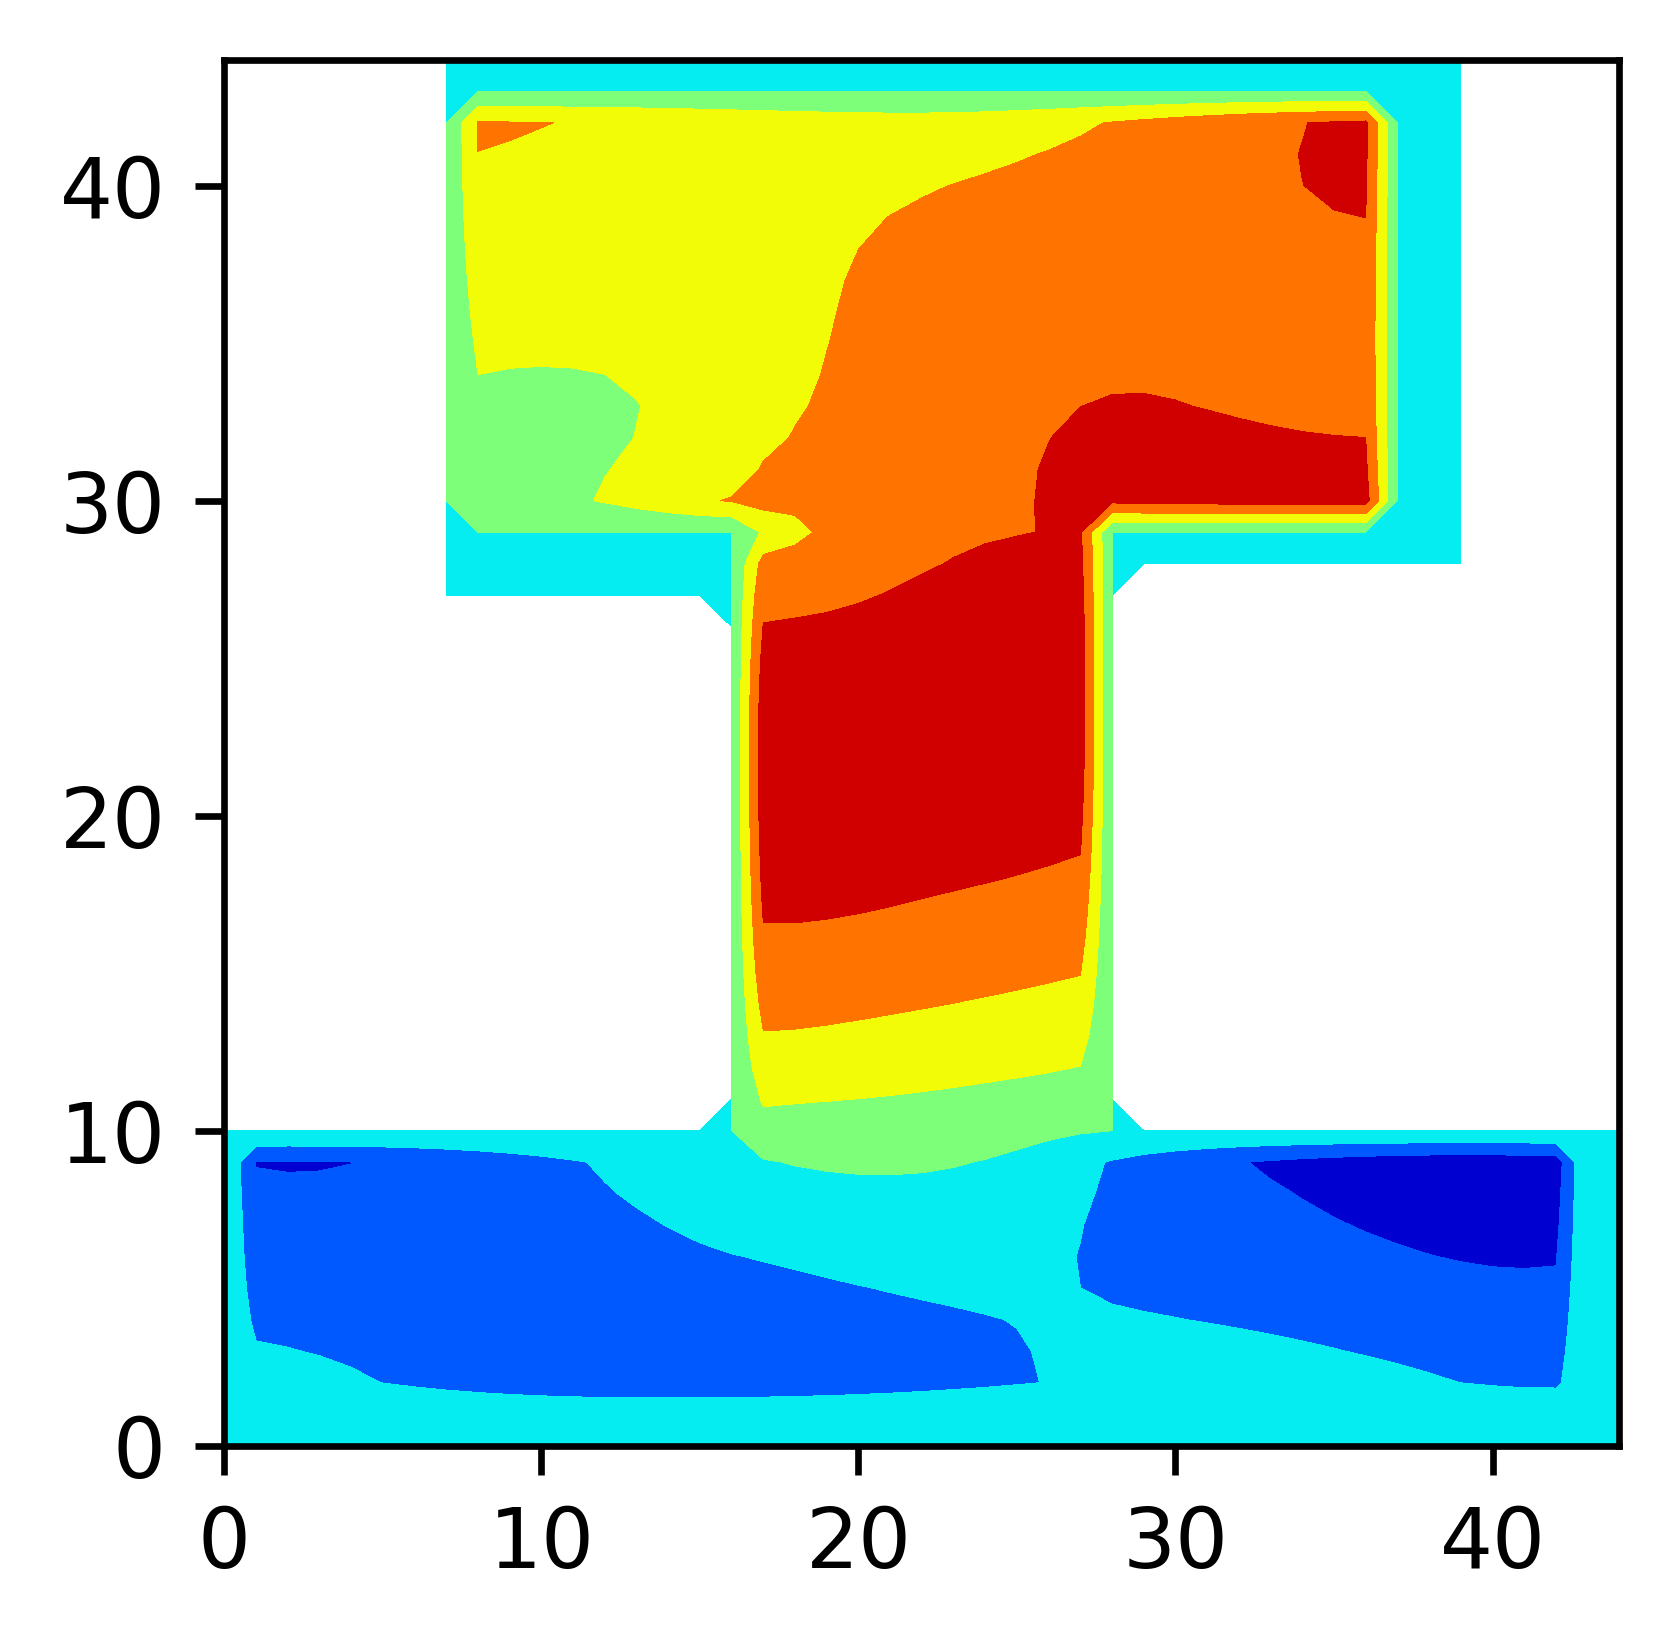

In [20]:
fig = plt.figure(figsize=(3,3), dpi=600)
t = 5000
plt.contourf(Data[:,:,t].T, cmap=plt.cm.jet)
#plt.title('Y Displacement at time step 5000 4 nodes from end')
plt.show()

In [21]:
row = 20

In [22]:
for i in range(Data.shape[0]):
    print(i,Data[i,row,t])

0 nan
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 nan
13 nan
14 nan
15 nan
16 0.0
17 2.789932970654682e-15
18 2.8128185794437076e-15
19 2.8158103072727685e-15
20 2.8050707530463843e-15
21 2.7858125838549354e-15
22 2.761574755098764e-15
23 2.734404970173865e-15
24 2.7049614658984844e-15
25 2.6722220680944322e-15
26 2.632535164437219e-15
27 2.5781173895528944e-15
28 0.0
29 nan
30 nan
31 nan
32 nan
33 nan
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan


In [23]:
CS = 11
CE = 18

CS=17
CE=27

#CS=8
#CE=36

#CS = 1000
#CE = 5000

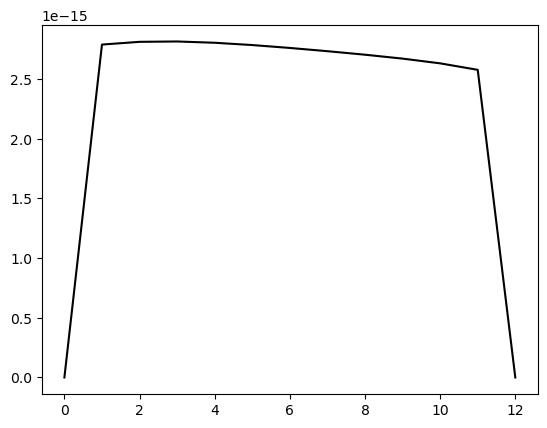

In [24]:
fig = plt.figure()
plt.plot(Data[CS-1:CE+2,row,t])
plt.show()

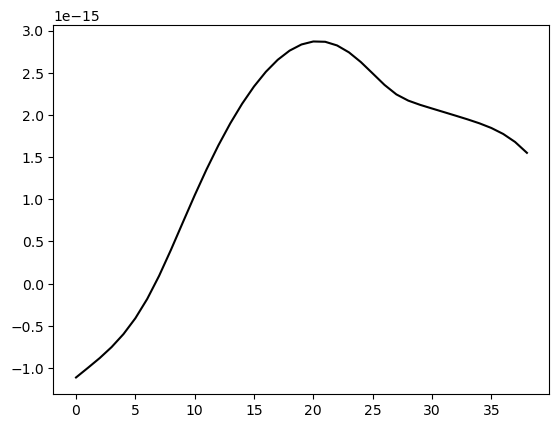

In [25]:
fig = plt.figure()
plt.plot(Data[22,2:41,t])
plt.show()

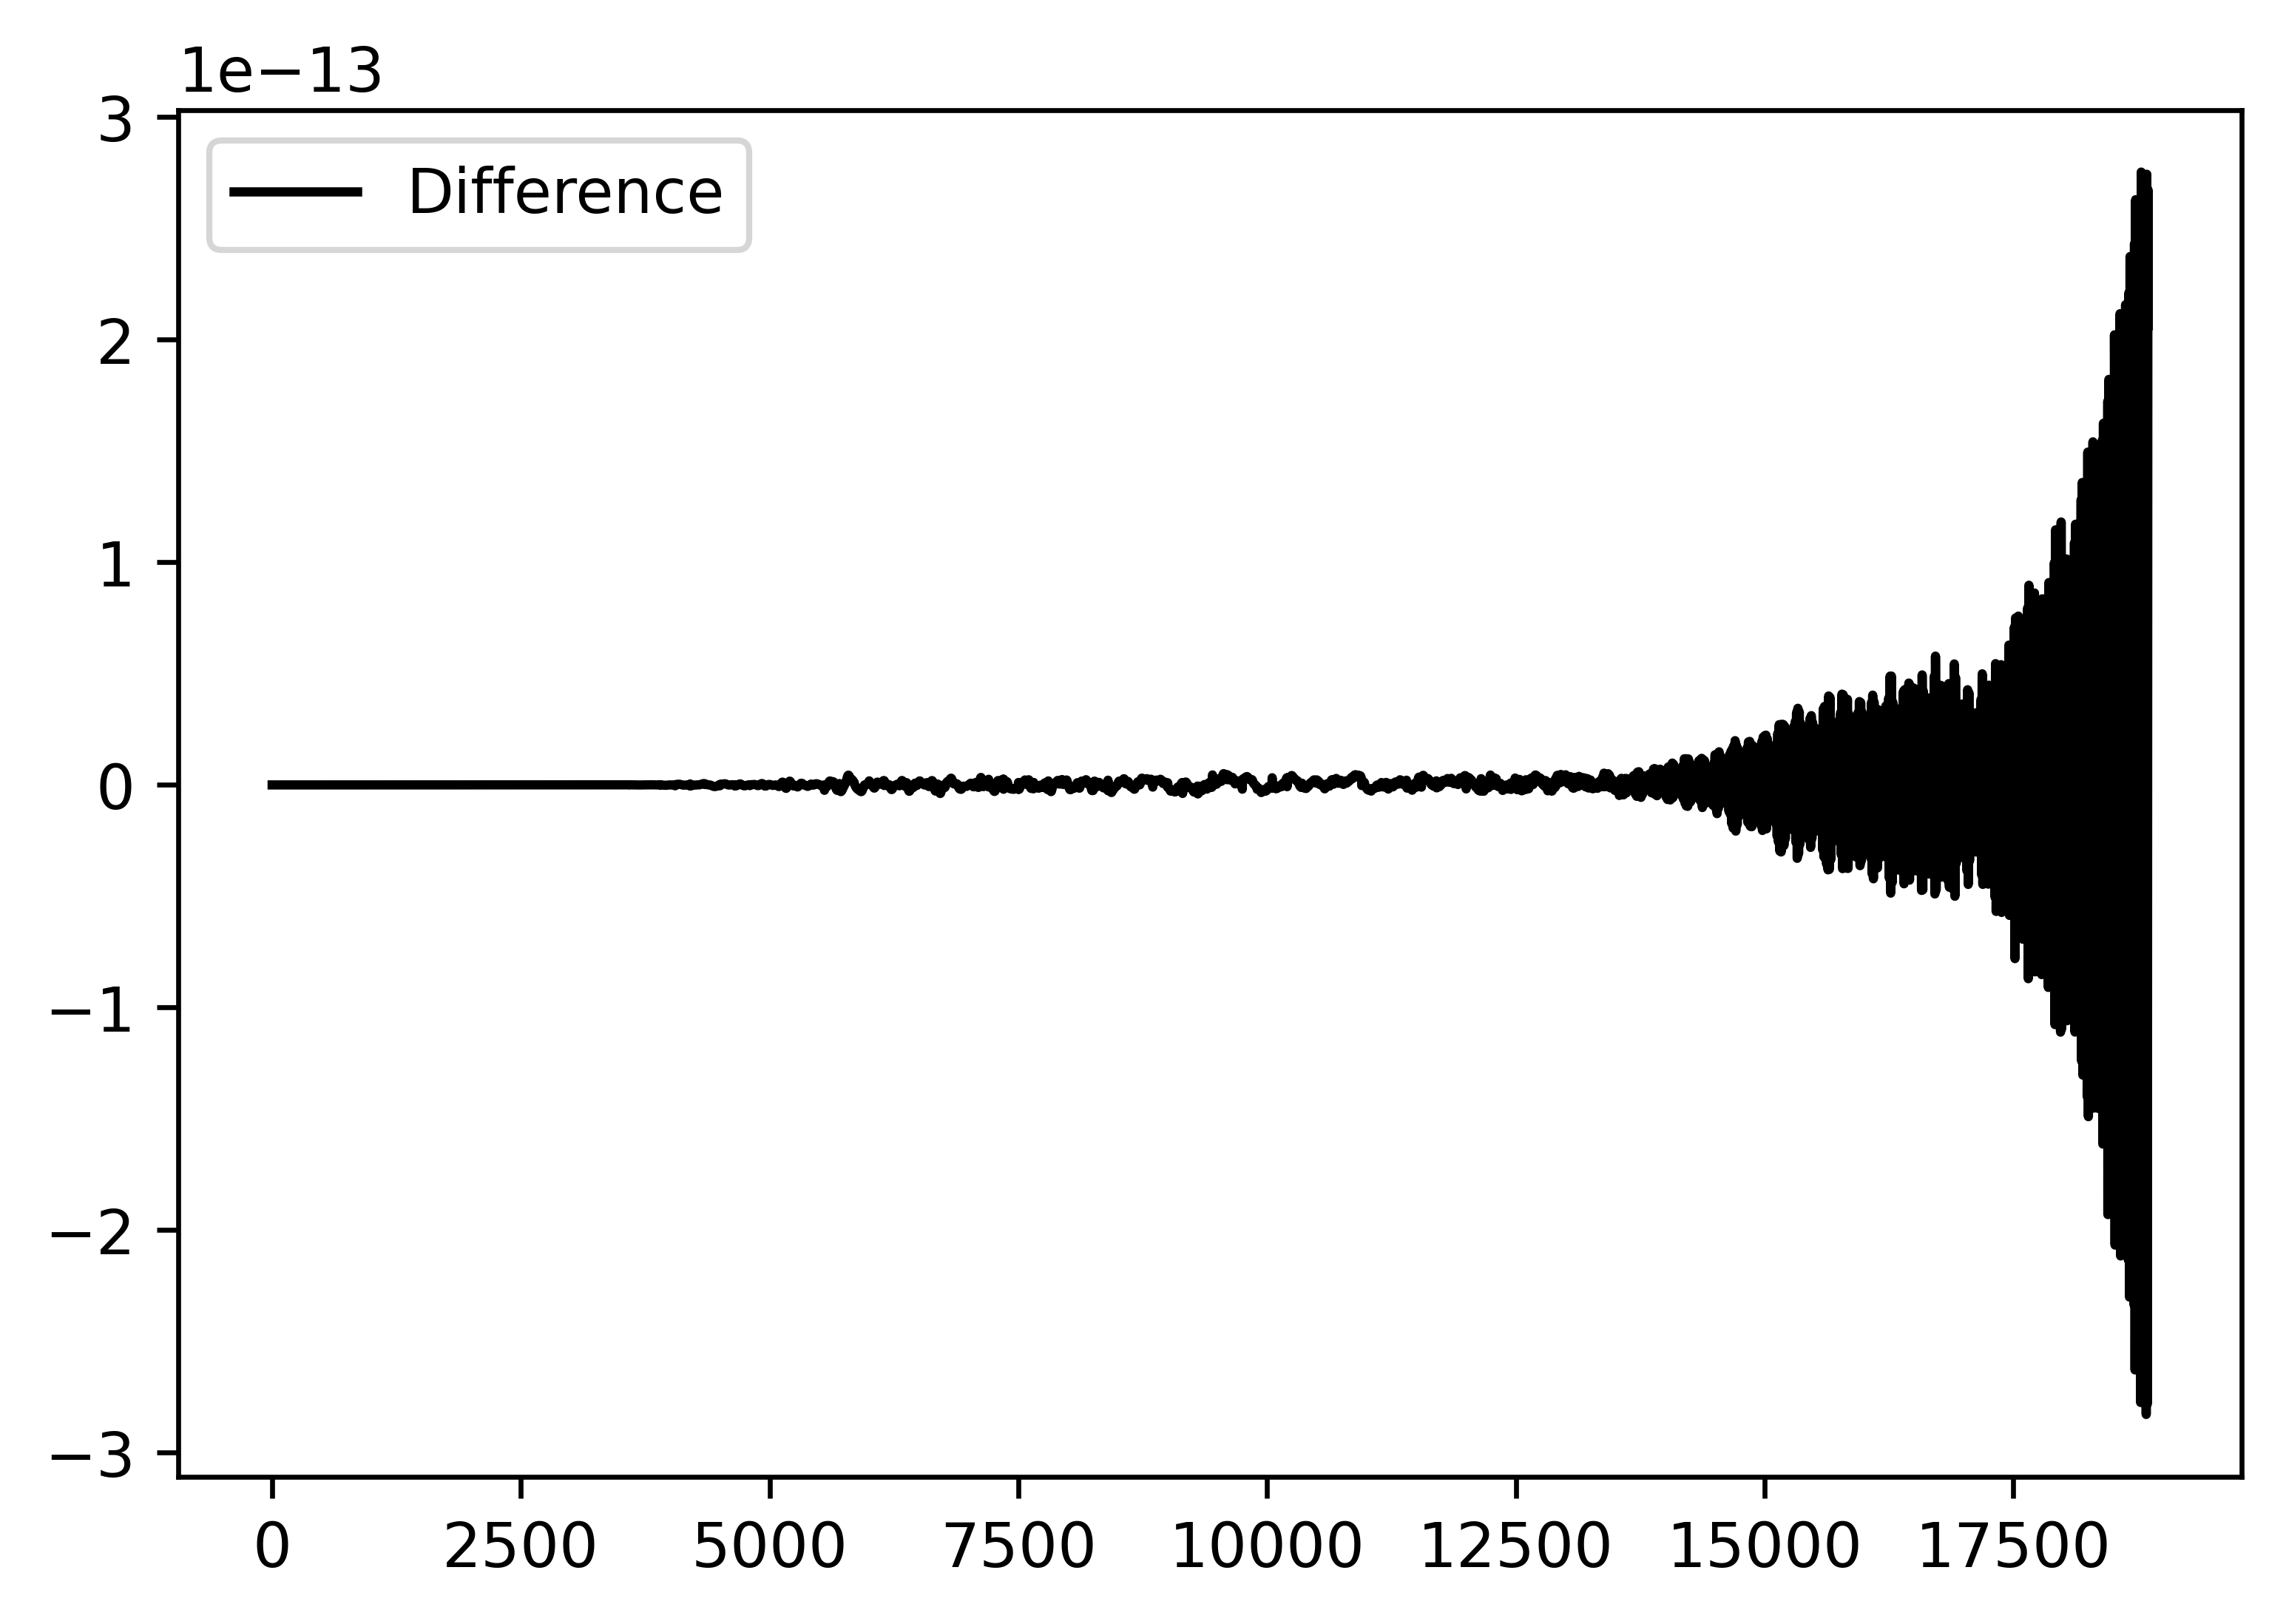

In [26]:
fig = plt.figure(figsize=(6,4),dpi=600)
#plt.plot(Data[CS,row,:15000],label='Right')
#plt.plot(Data[CE,row,:15000],label='Left')
plt.plot(Data[CS,row,:]-Data[CE,row,:], label='Difference')
plt.legend()
plt.show()

In [27]:
TailAverage = np.average(Data[CS,row,11000:15000])
Temp=np.zeros(15000)
Temp[:8500]= Data[CS,row,:8500]
for i in np.linspace(8000,10500,2501,dtype=int):
    Temp[i] = Data[CS,row,i]-((TailAverage/2500)*(i-8000))
Temp[10500:]=Data[CS,row,10500:15000]-TailAverage

In [28]:
sr = 15
SampledS = np.zeros((int(len(Data[CS,row,:])/sr)))
SampledE = np.zeros((int(len(Data[CS,row,:])/sr)))
for i in range(len(SampledS)):
    SampledS[i]=np.average(Data[CS,row,i*sr:i*sr+sr])
    SampledE[i]=np.average(Data[CE,row,i*sr:i*sr+sr])
SampledS.flatten()
SampledE.flatten()
SampledS = cf.Smoothing(SampledS,3)
SampledE = cf.Smoothing(SampledE,3)
SampledD = SampledS-SampledE

## FingerPrinting

In [29]:
Wvlt = 'db3'
NumScales=50
start = 0
end = 16500
ss = 1

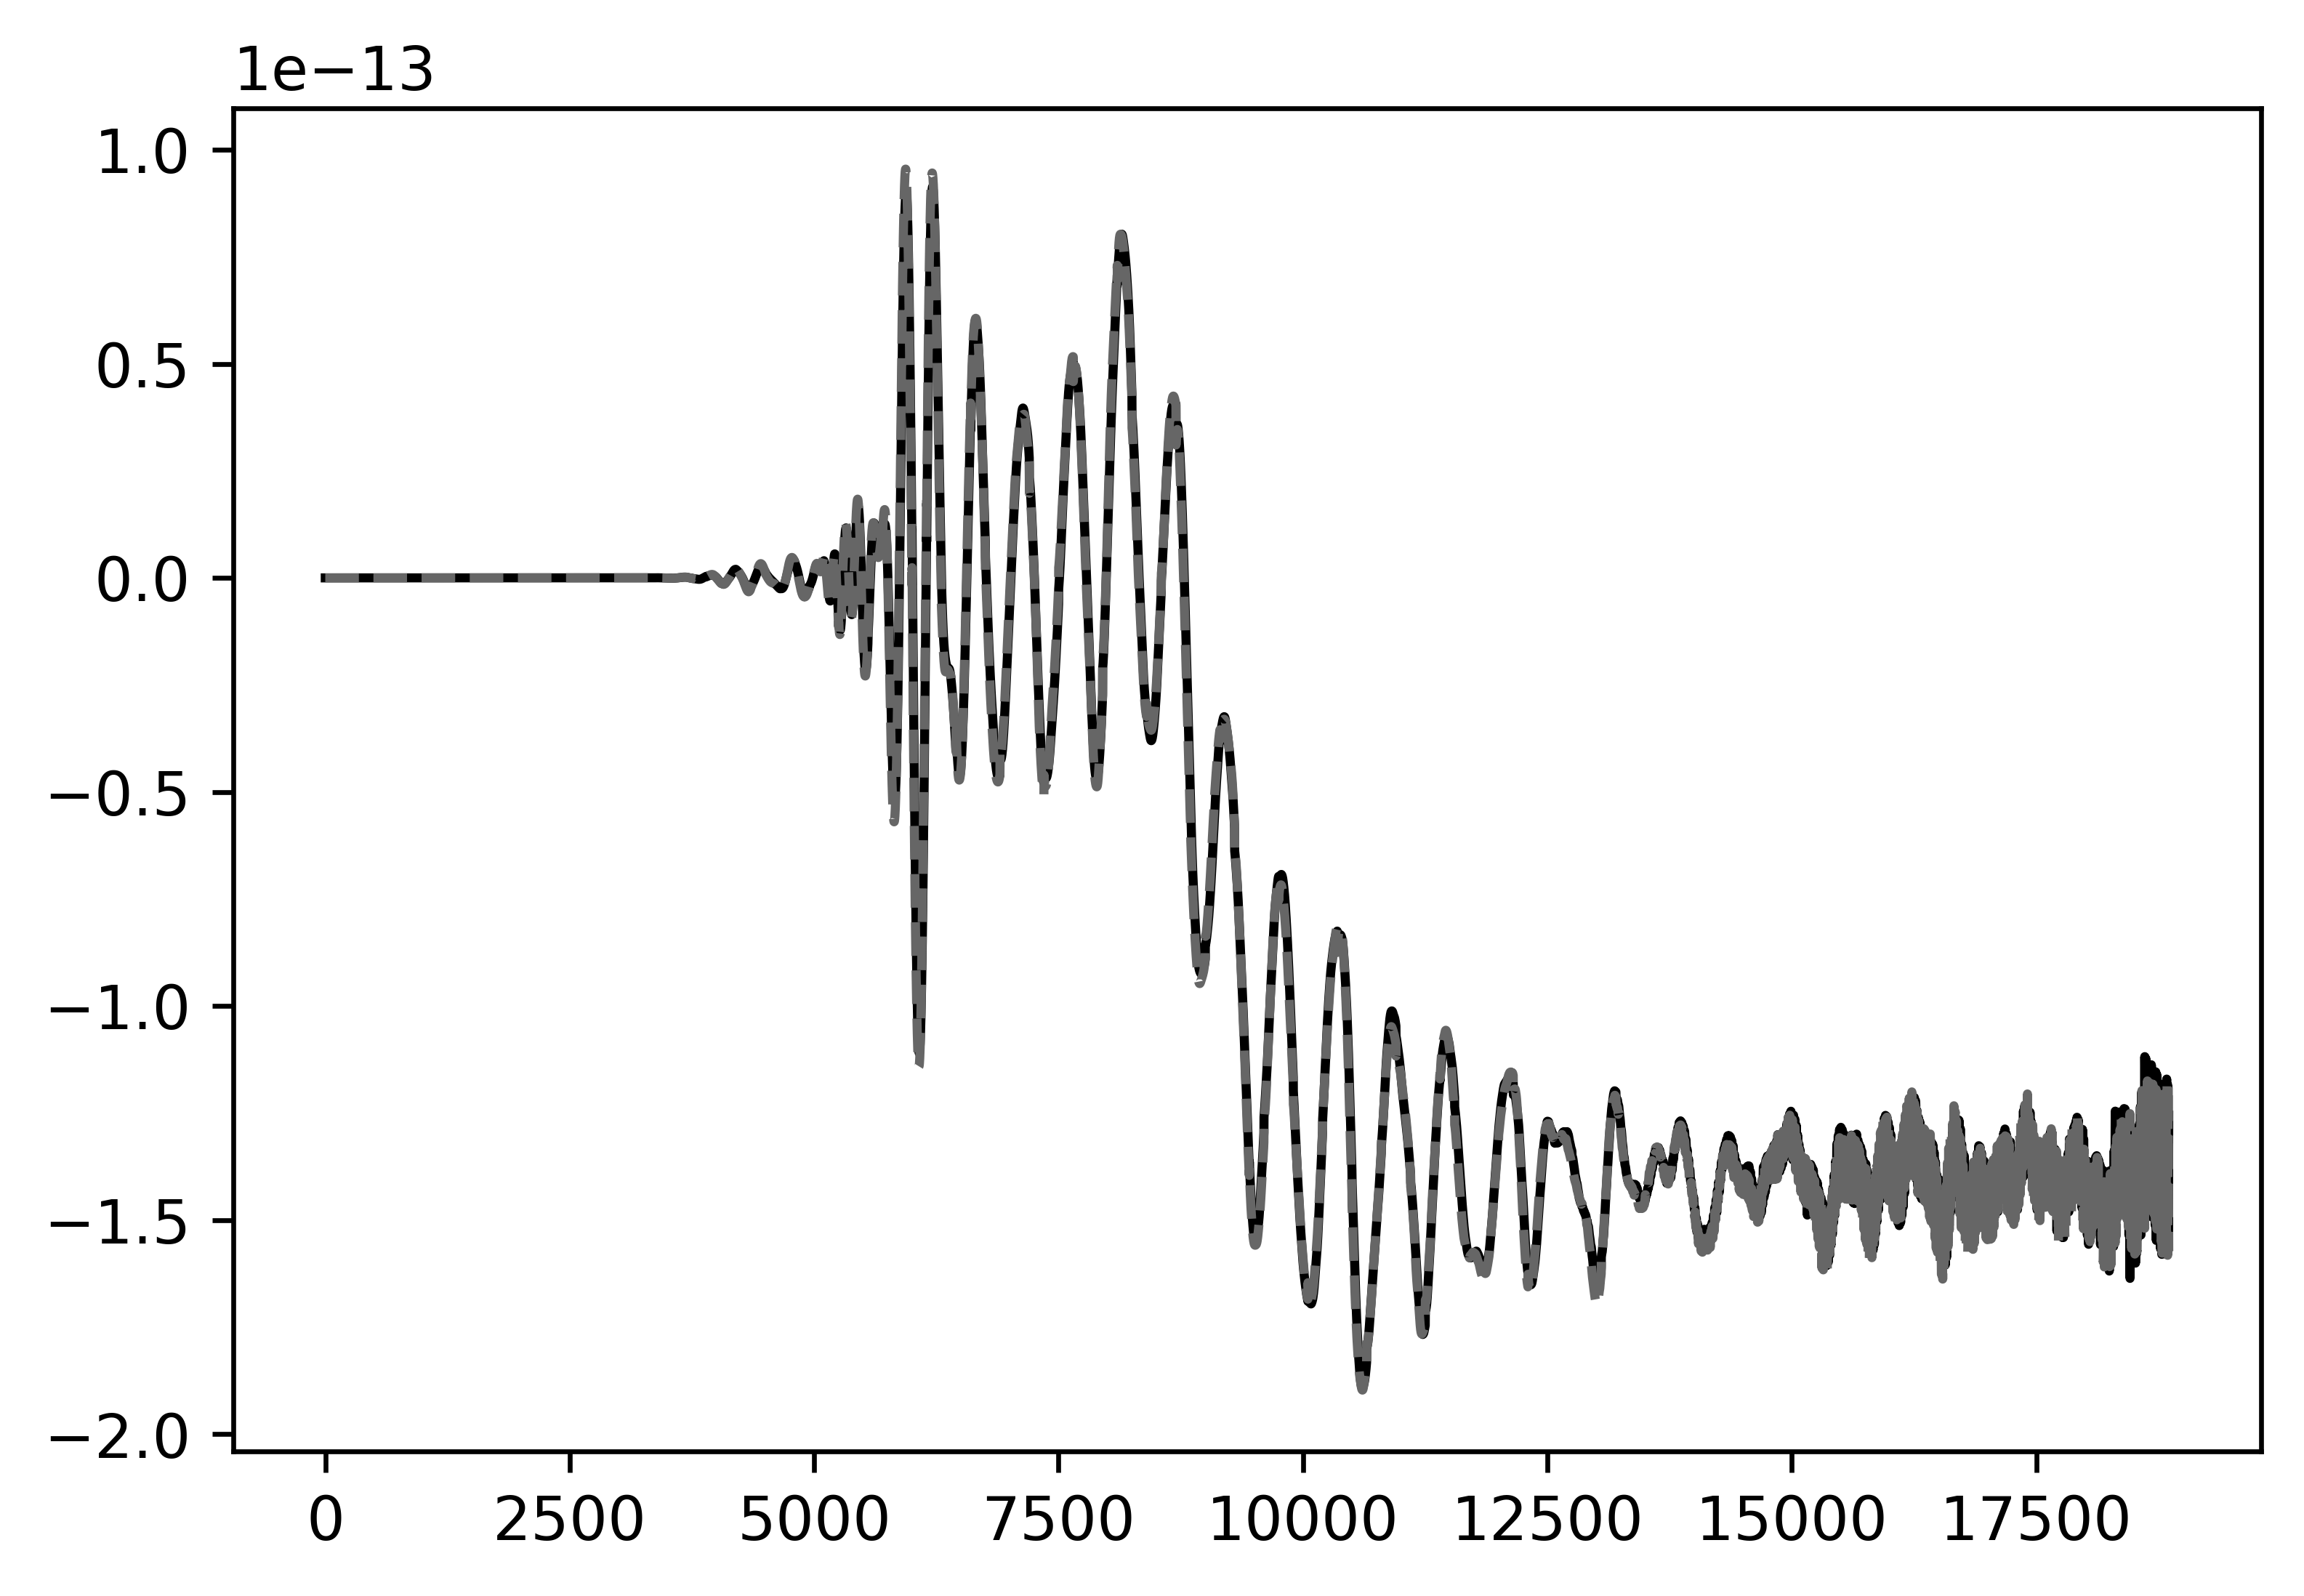

In [30]:
fig = plt.figure(figsize=(6,4),dpi=600)
#plt.plot(Temp)
plt.plot(cf.Smoothing(Data[CS,row,:],3),label='Left')
plt.plot(cf.Smoothing(Data[CE,row,:],3),label='Right')
plt.show()

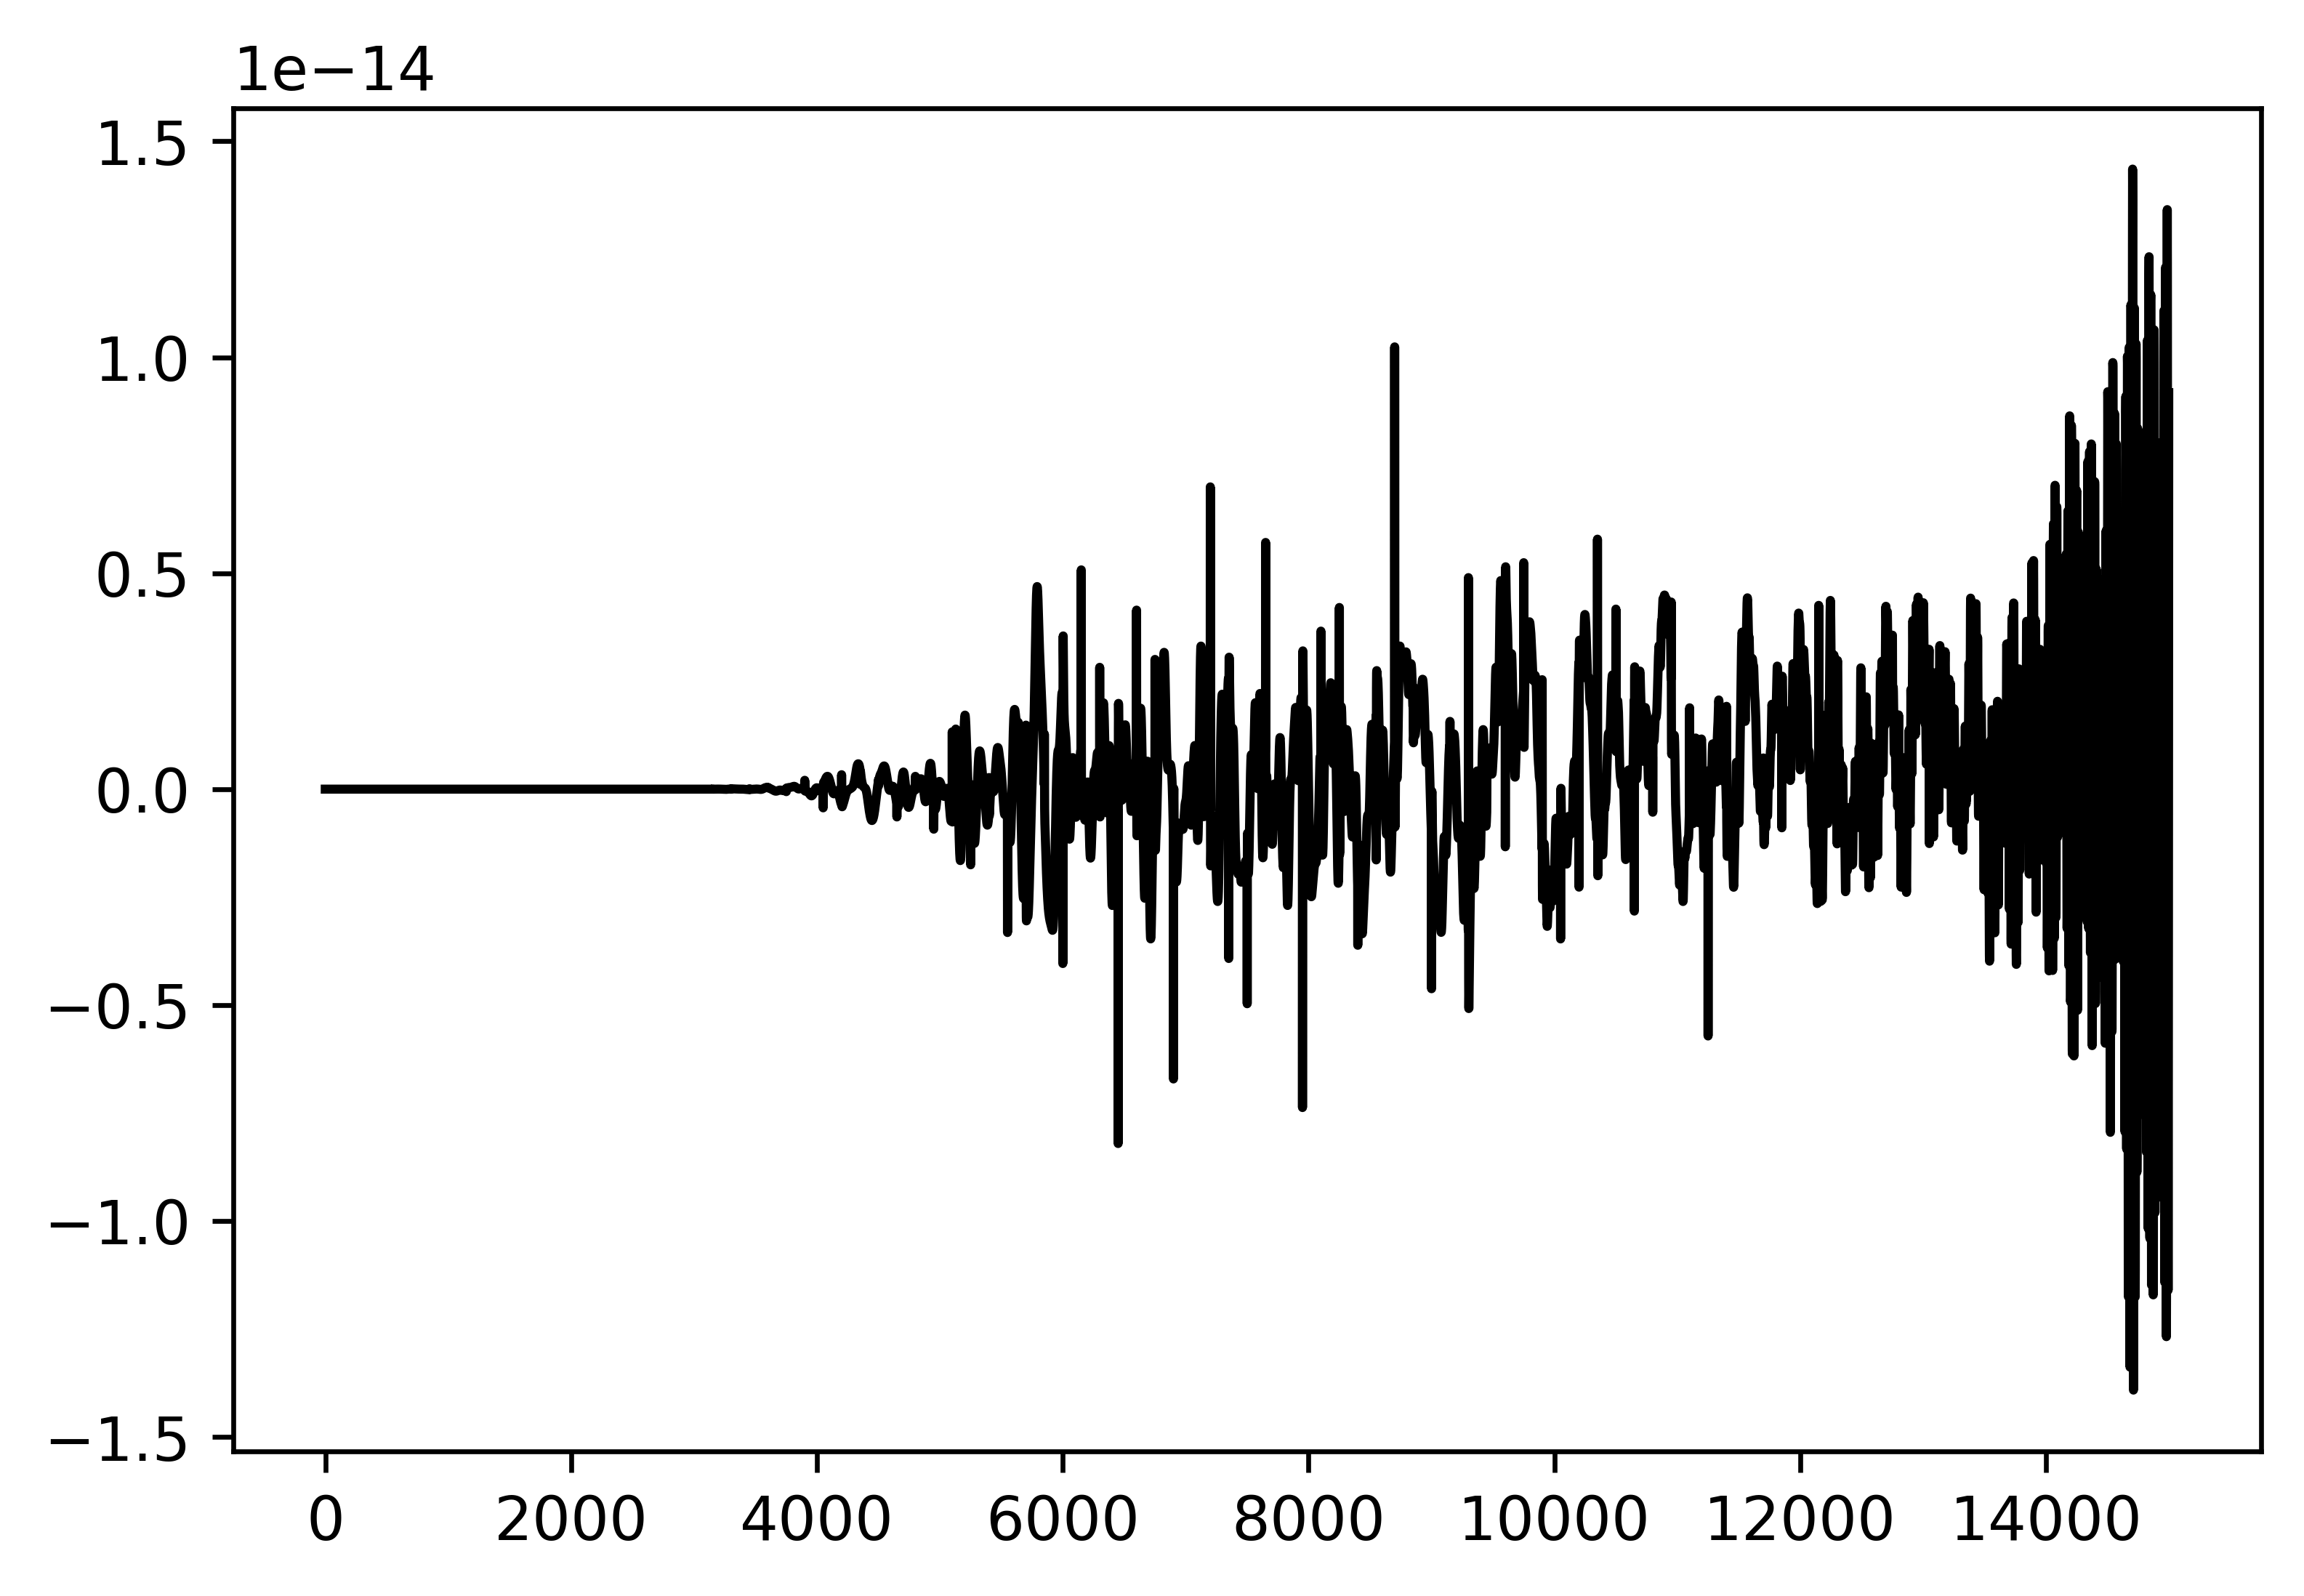

In [31]:
fig = plt.figure(figsize=(6,4),dpi=600)
#plt.plot(Data[CS,row,:14000]-Data[CE,row,:14000], label='Difference')
plt.plot(cf.Smoothing(Data[CS,row,:15000],3)-cf.Smoothing(Data[CE,row,:15000],3))
#plt.legend()
plt.show()

In [32]:
18855*(1100/len(SampledS))

16500.0

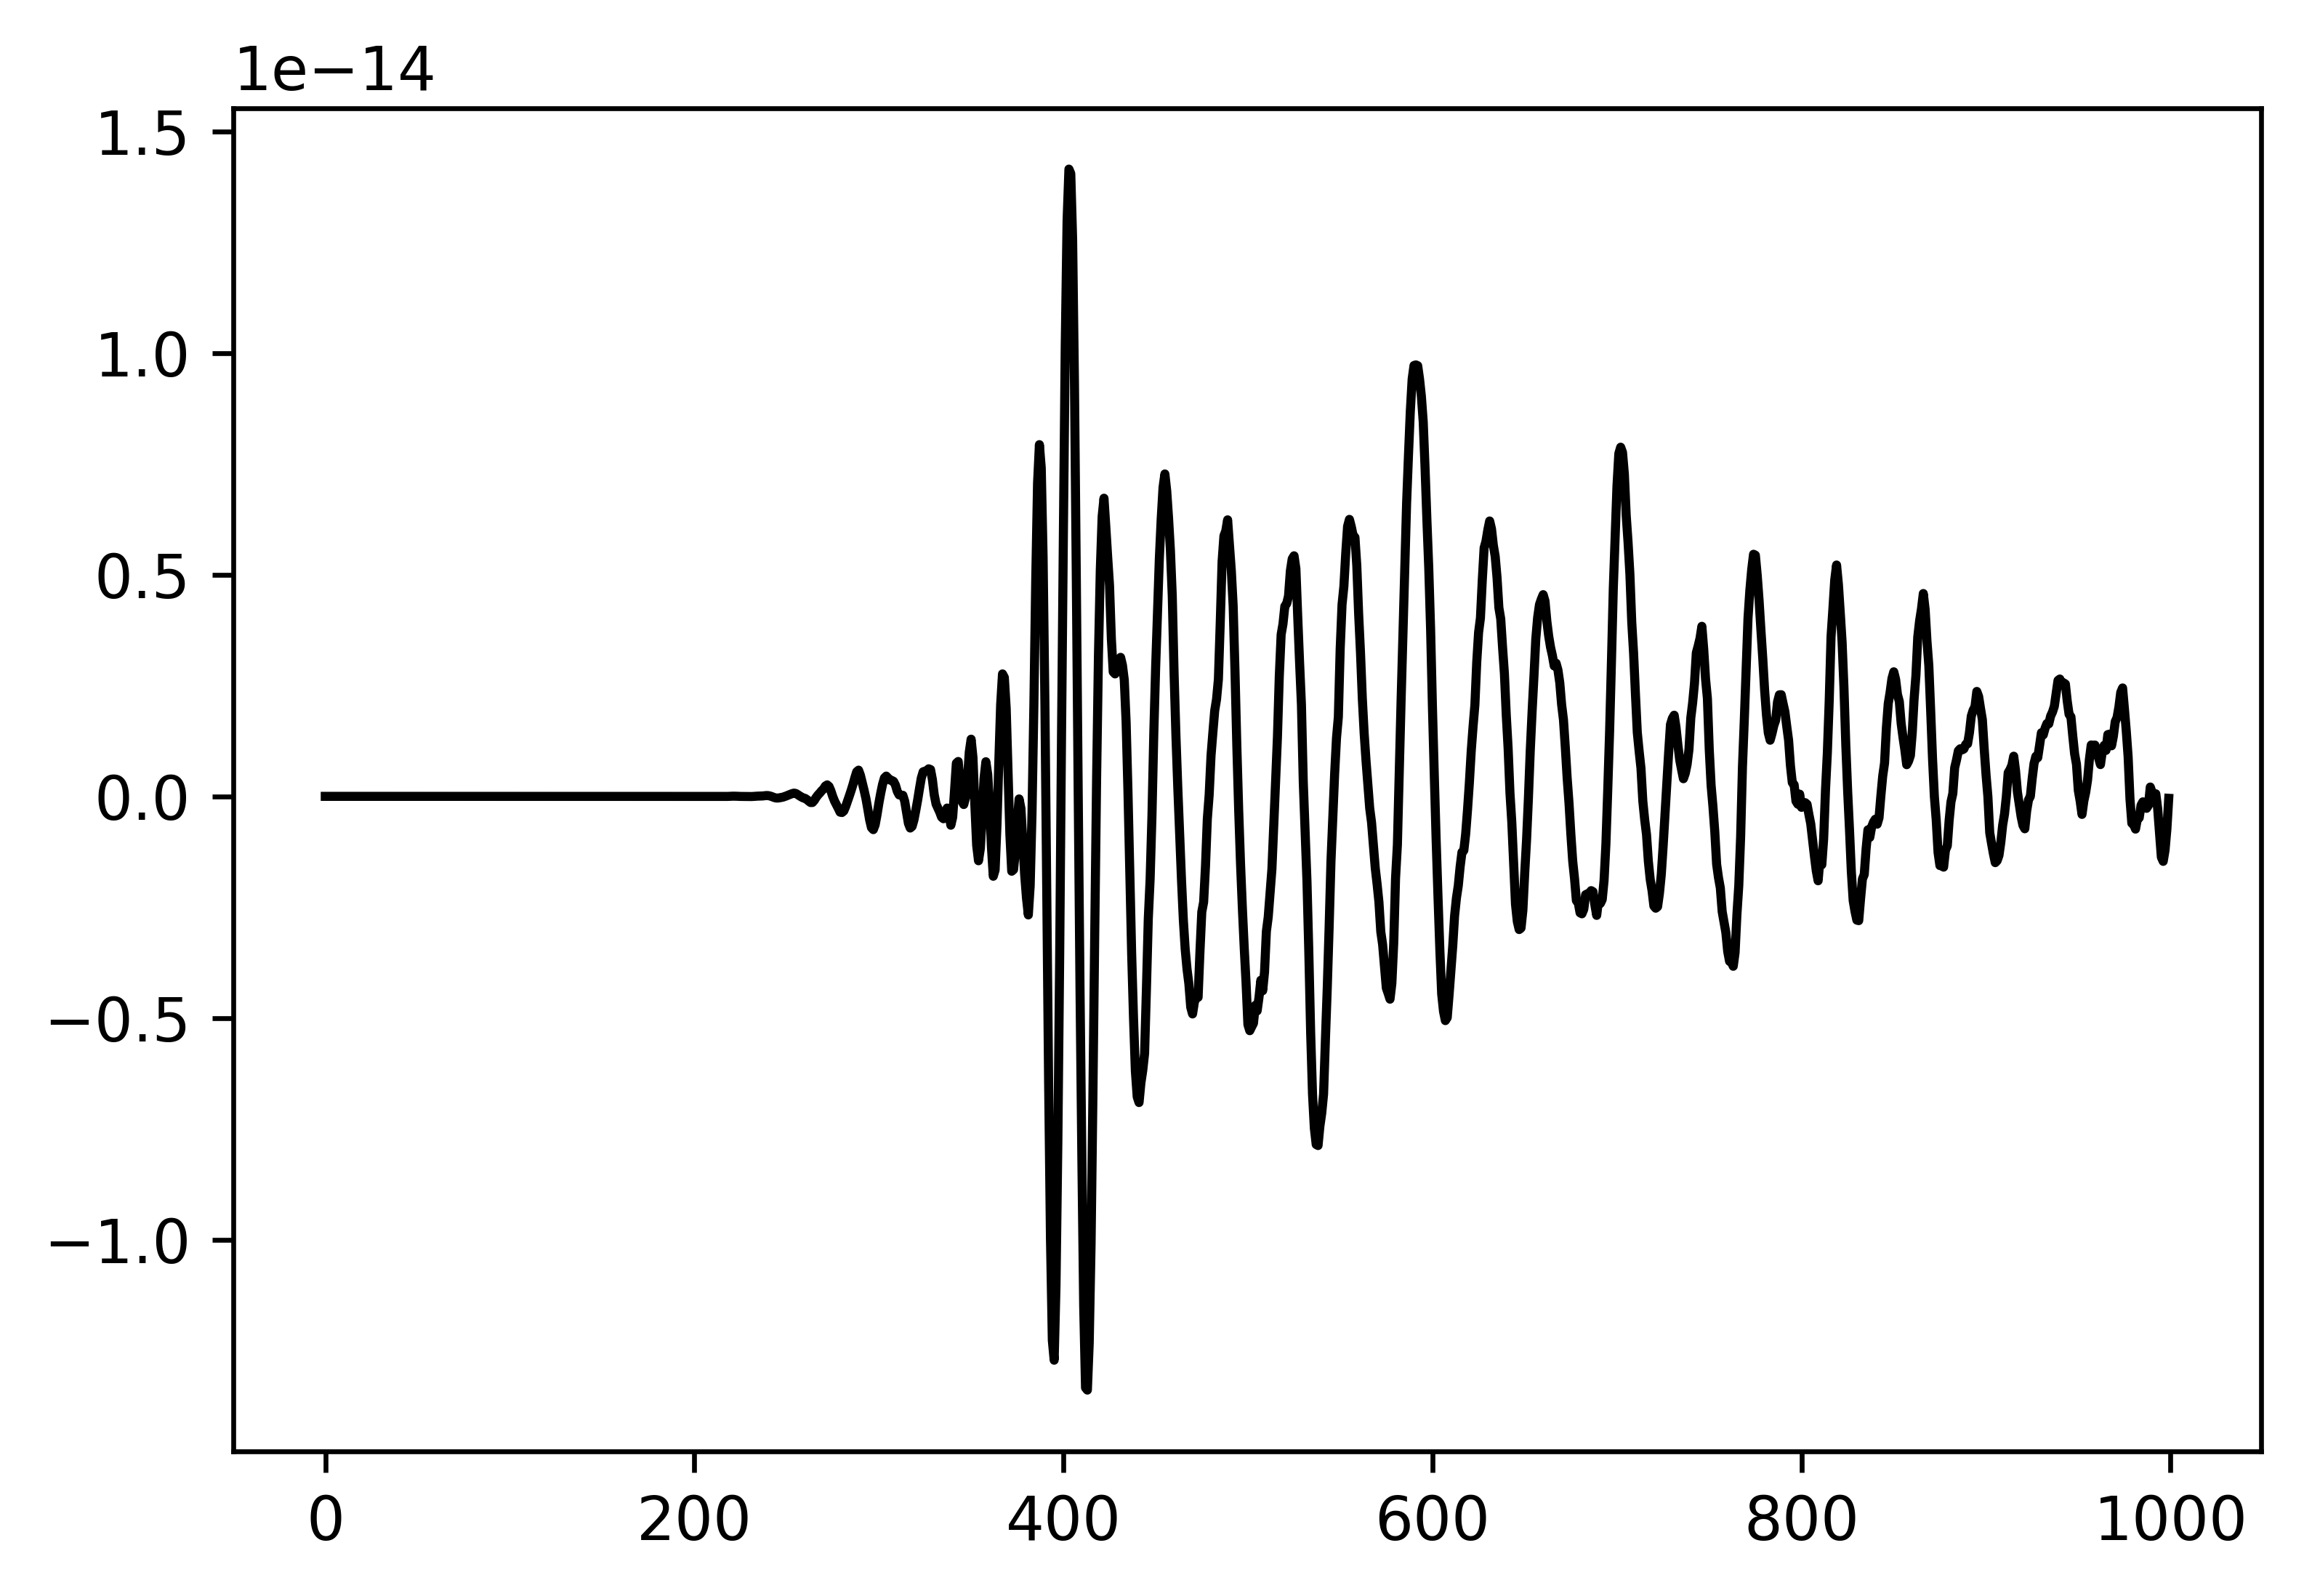

In [33]:
fig = plt.figure(figsize=(6,4),dpi=600)
#plt.plot(Data[CS,row,:14000]-Data[CE,row,:14000], label='Difference')
plt.plot(SampledS[:1000]-SampledE[:1000])
#plt.legend()
plt.show()

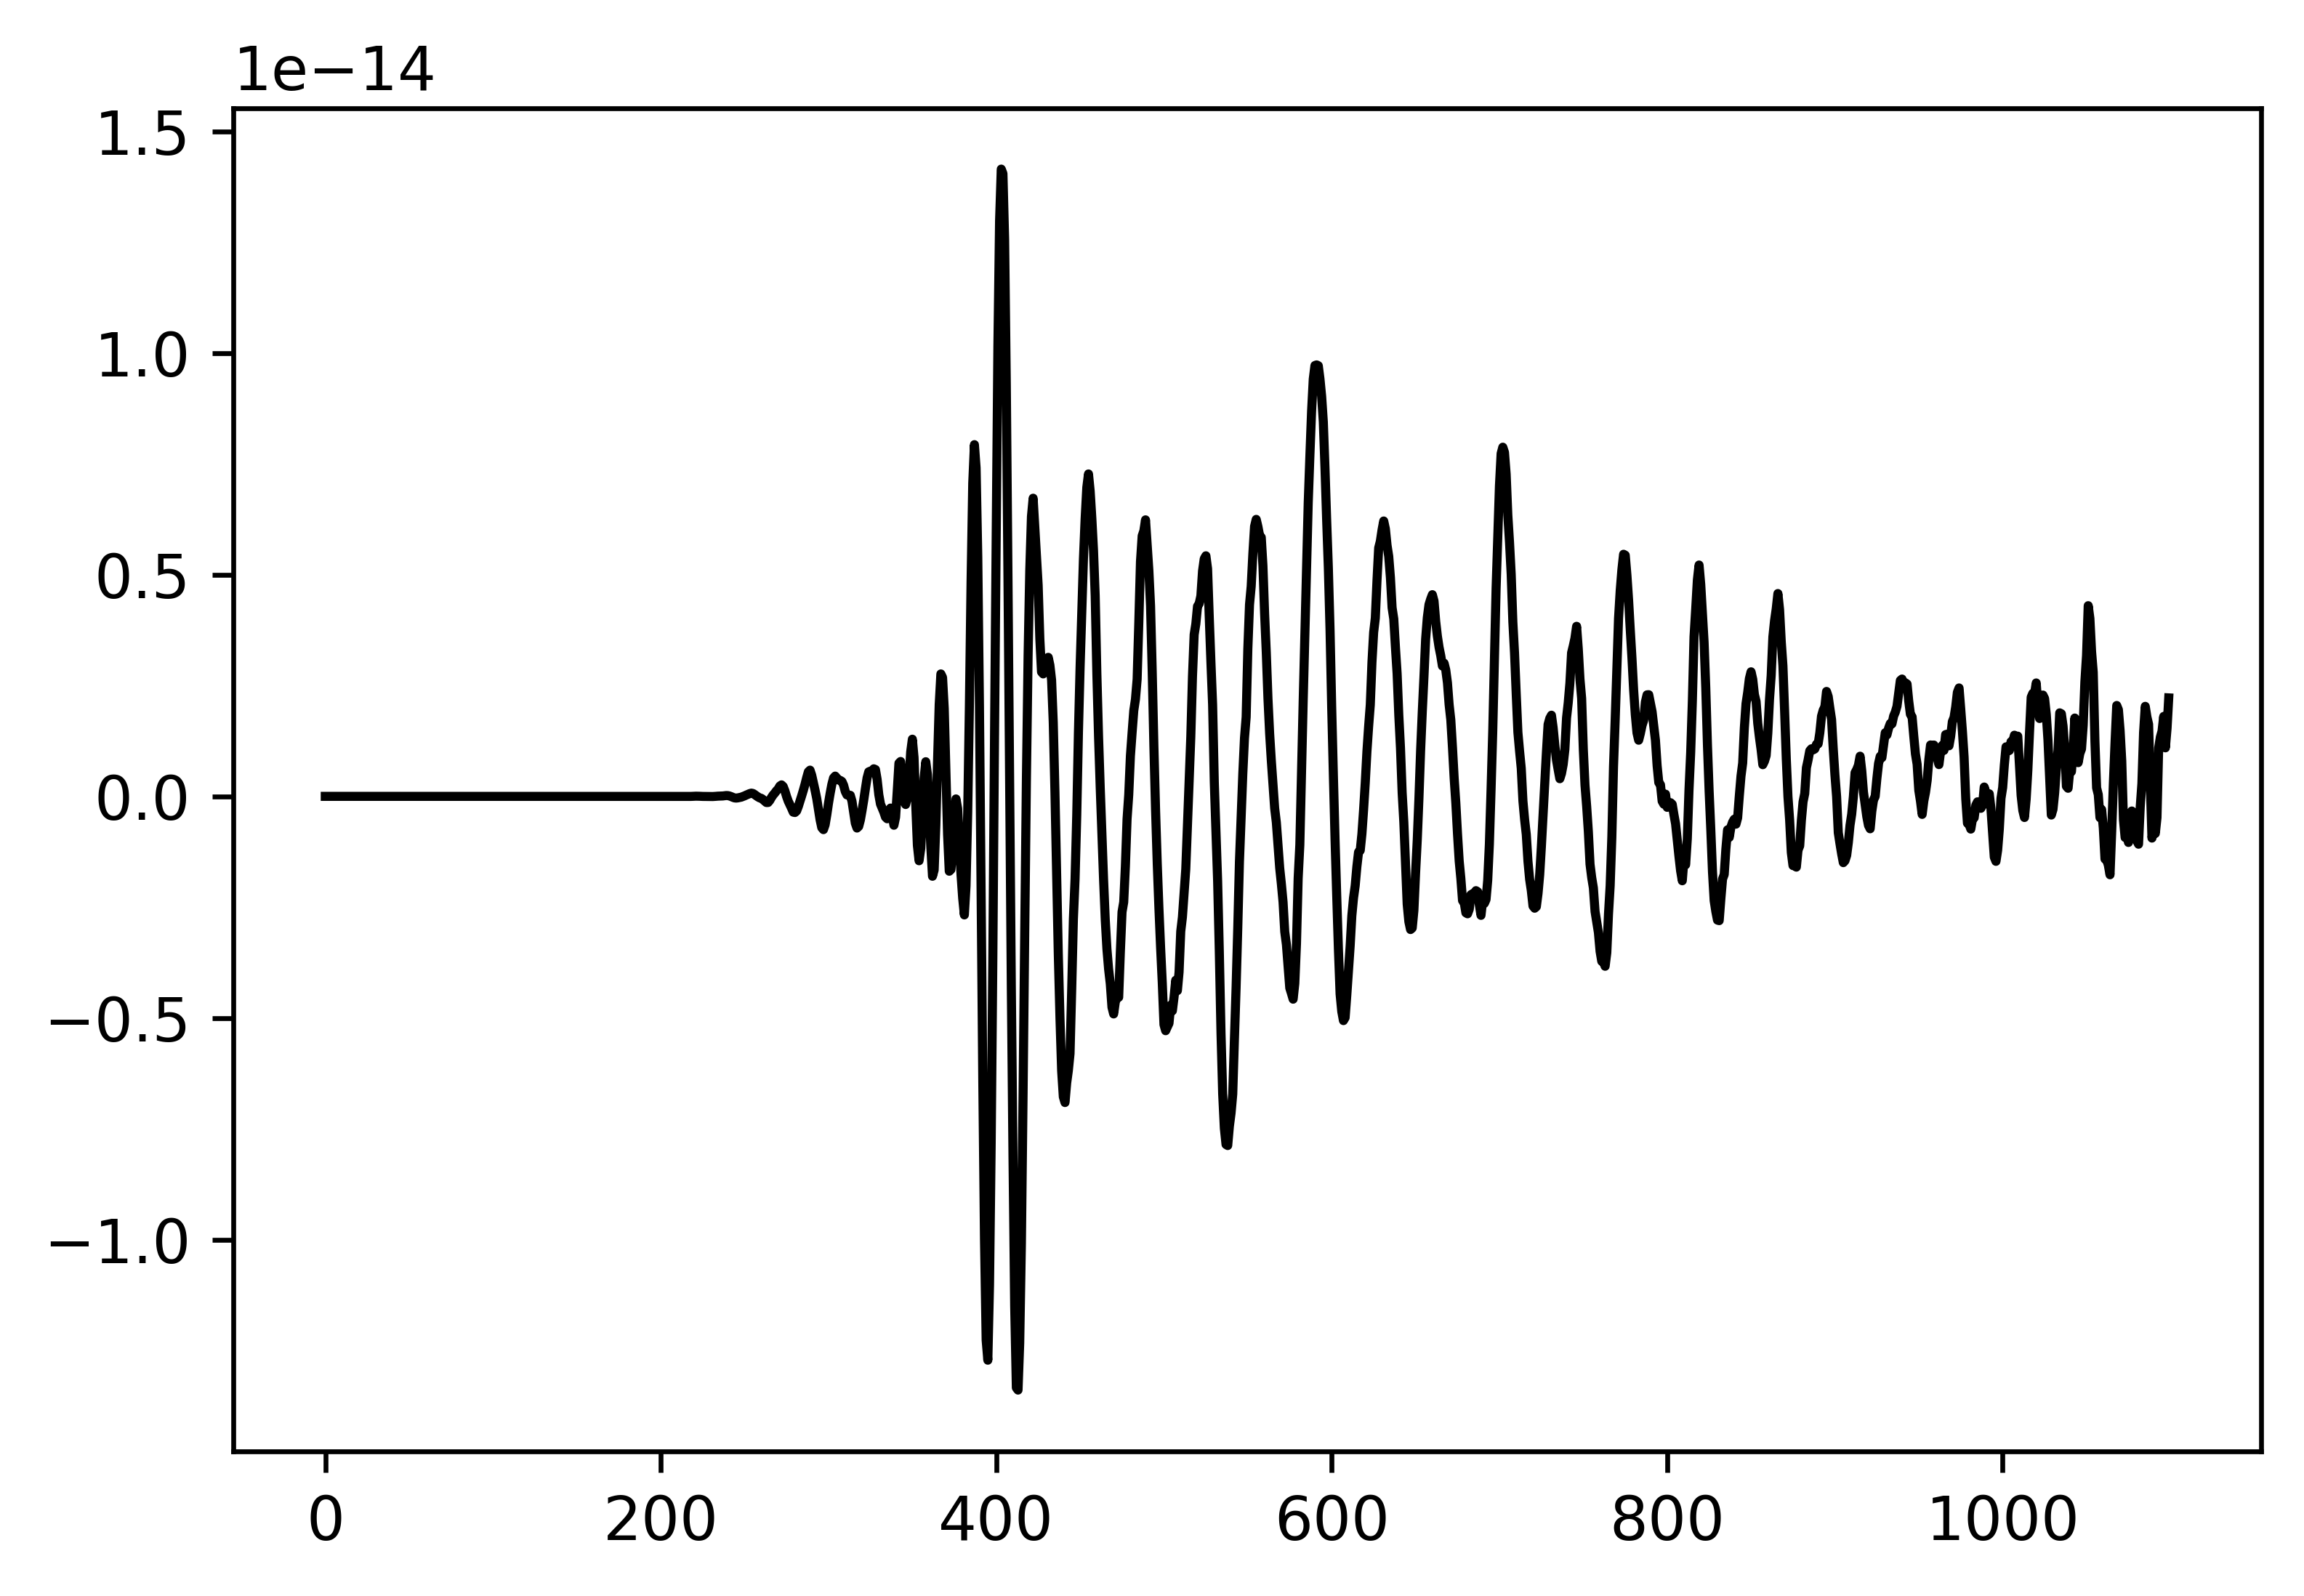

In [34]:
fig = plt.figure(figsize=(6,4),dpi=600)
#plt.plot(Data[CS,row,:14000]-Data[CE,row,:14000], label='Difference')
plt.plot(SampledD[:1100])
#plt.legend()
plt.show()

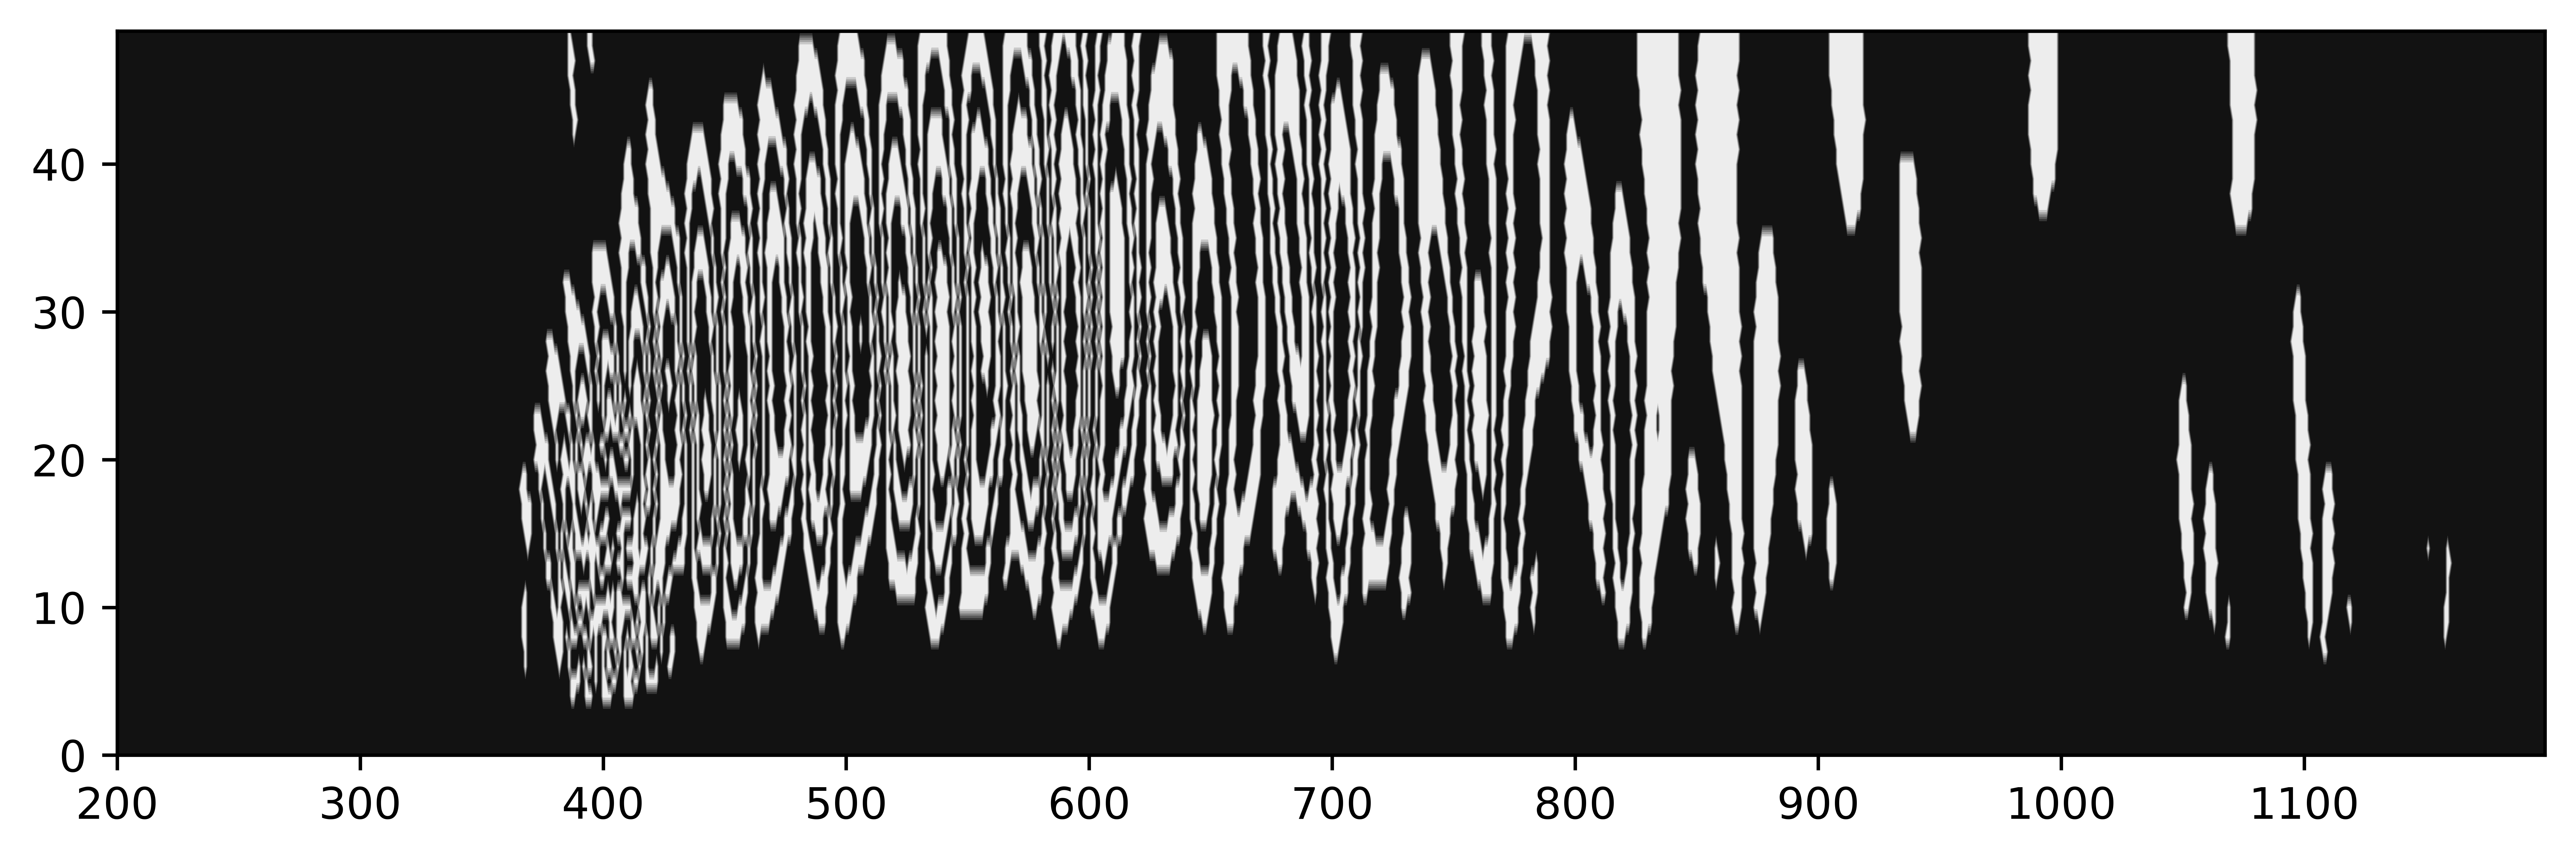

In [35]:
TPD = cf.getThumbprint2(SampledD[200:1200], wvt=Wvlt, ns=NumScales, scalespace = ss, numslices=6, slicethickness=0.12, 
                  valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=1200)
X = np.arange(0,50)
Y = np.arange(200,1200)
plt.contourf(Y,X,TPD.T, cmap='gist_gray')
plt.locator_params(axis='x', nbins=10) 
#plt.title('Test')
plt.show()


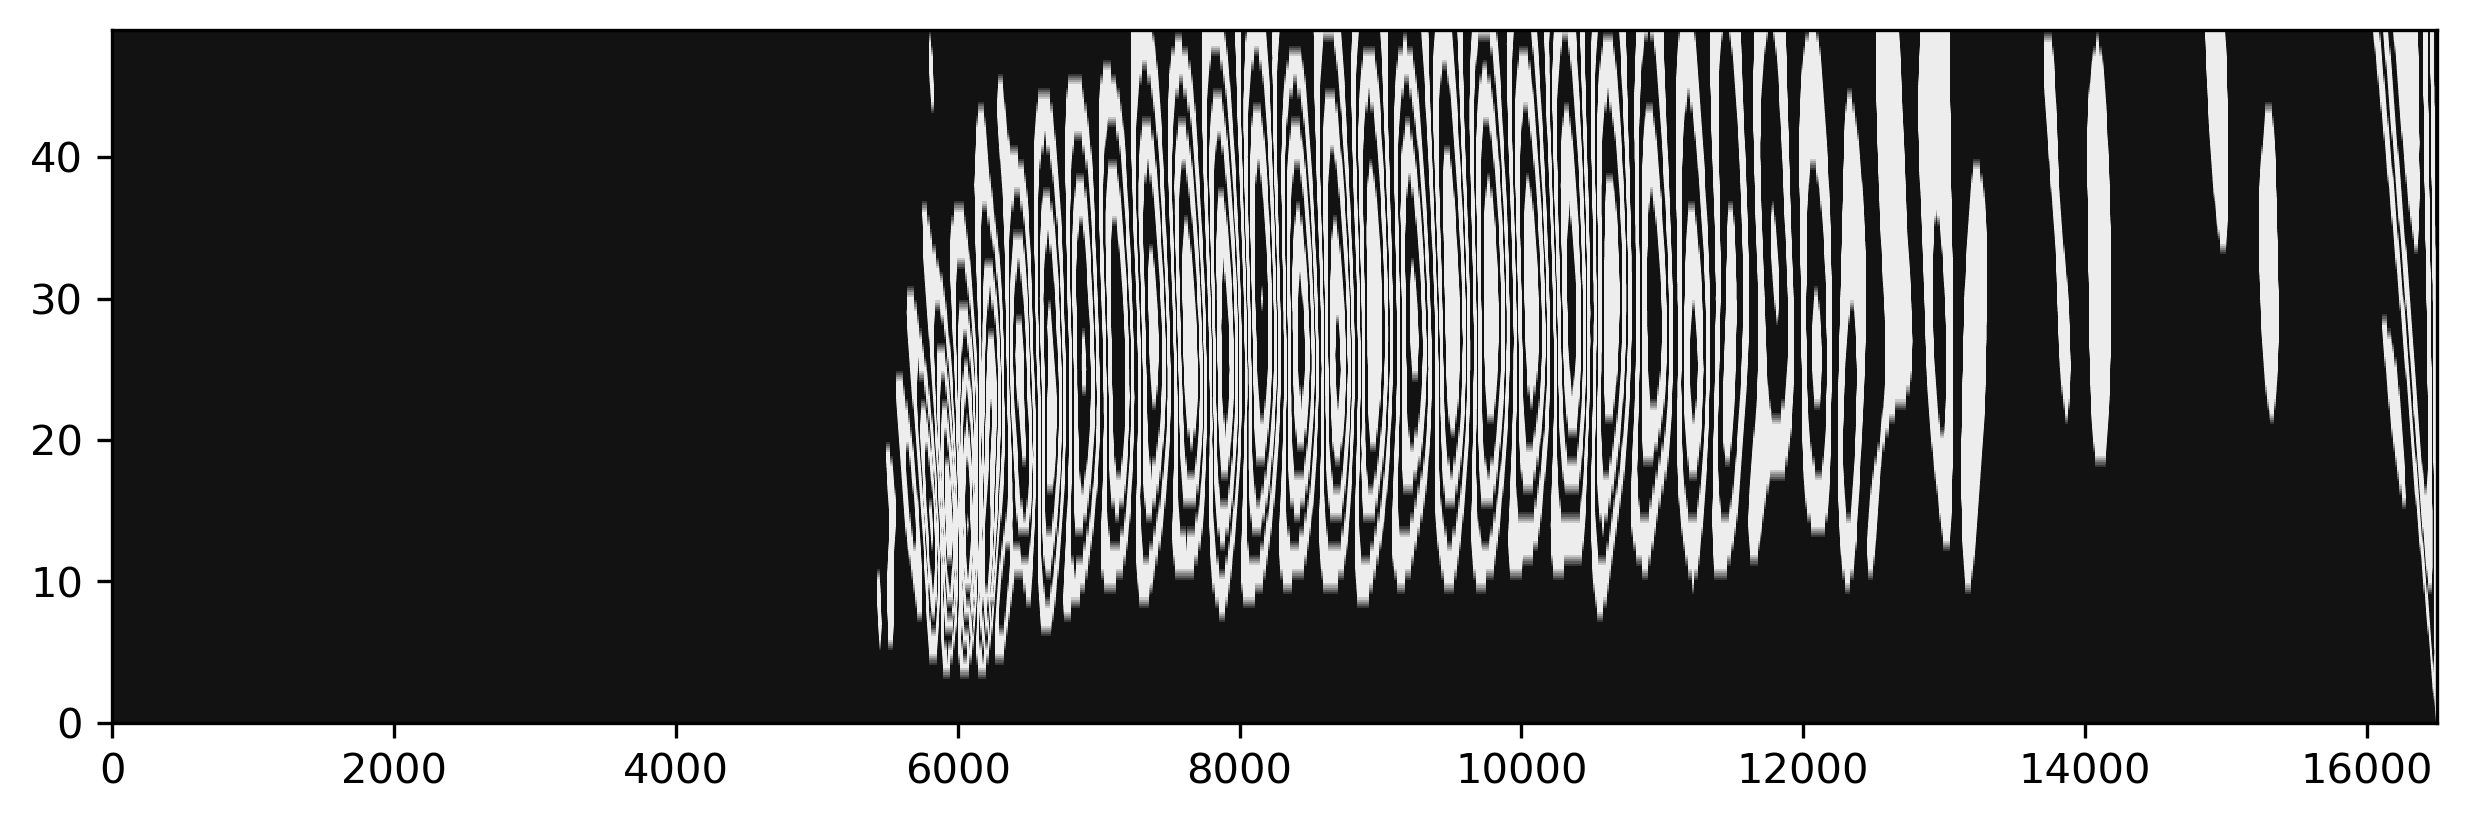

In [36]:
TP1 = cf.getThumbprint2(cf.Smoothing(Data[CS,row,start:end].T,3), wvt=Wvlt, ns=NumScales, 
                        scalespace = sr, numslices=6, slicethickness=0.12, 
                        valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TP1.T, cmap='gist_gray')
plt.show()


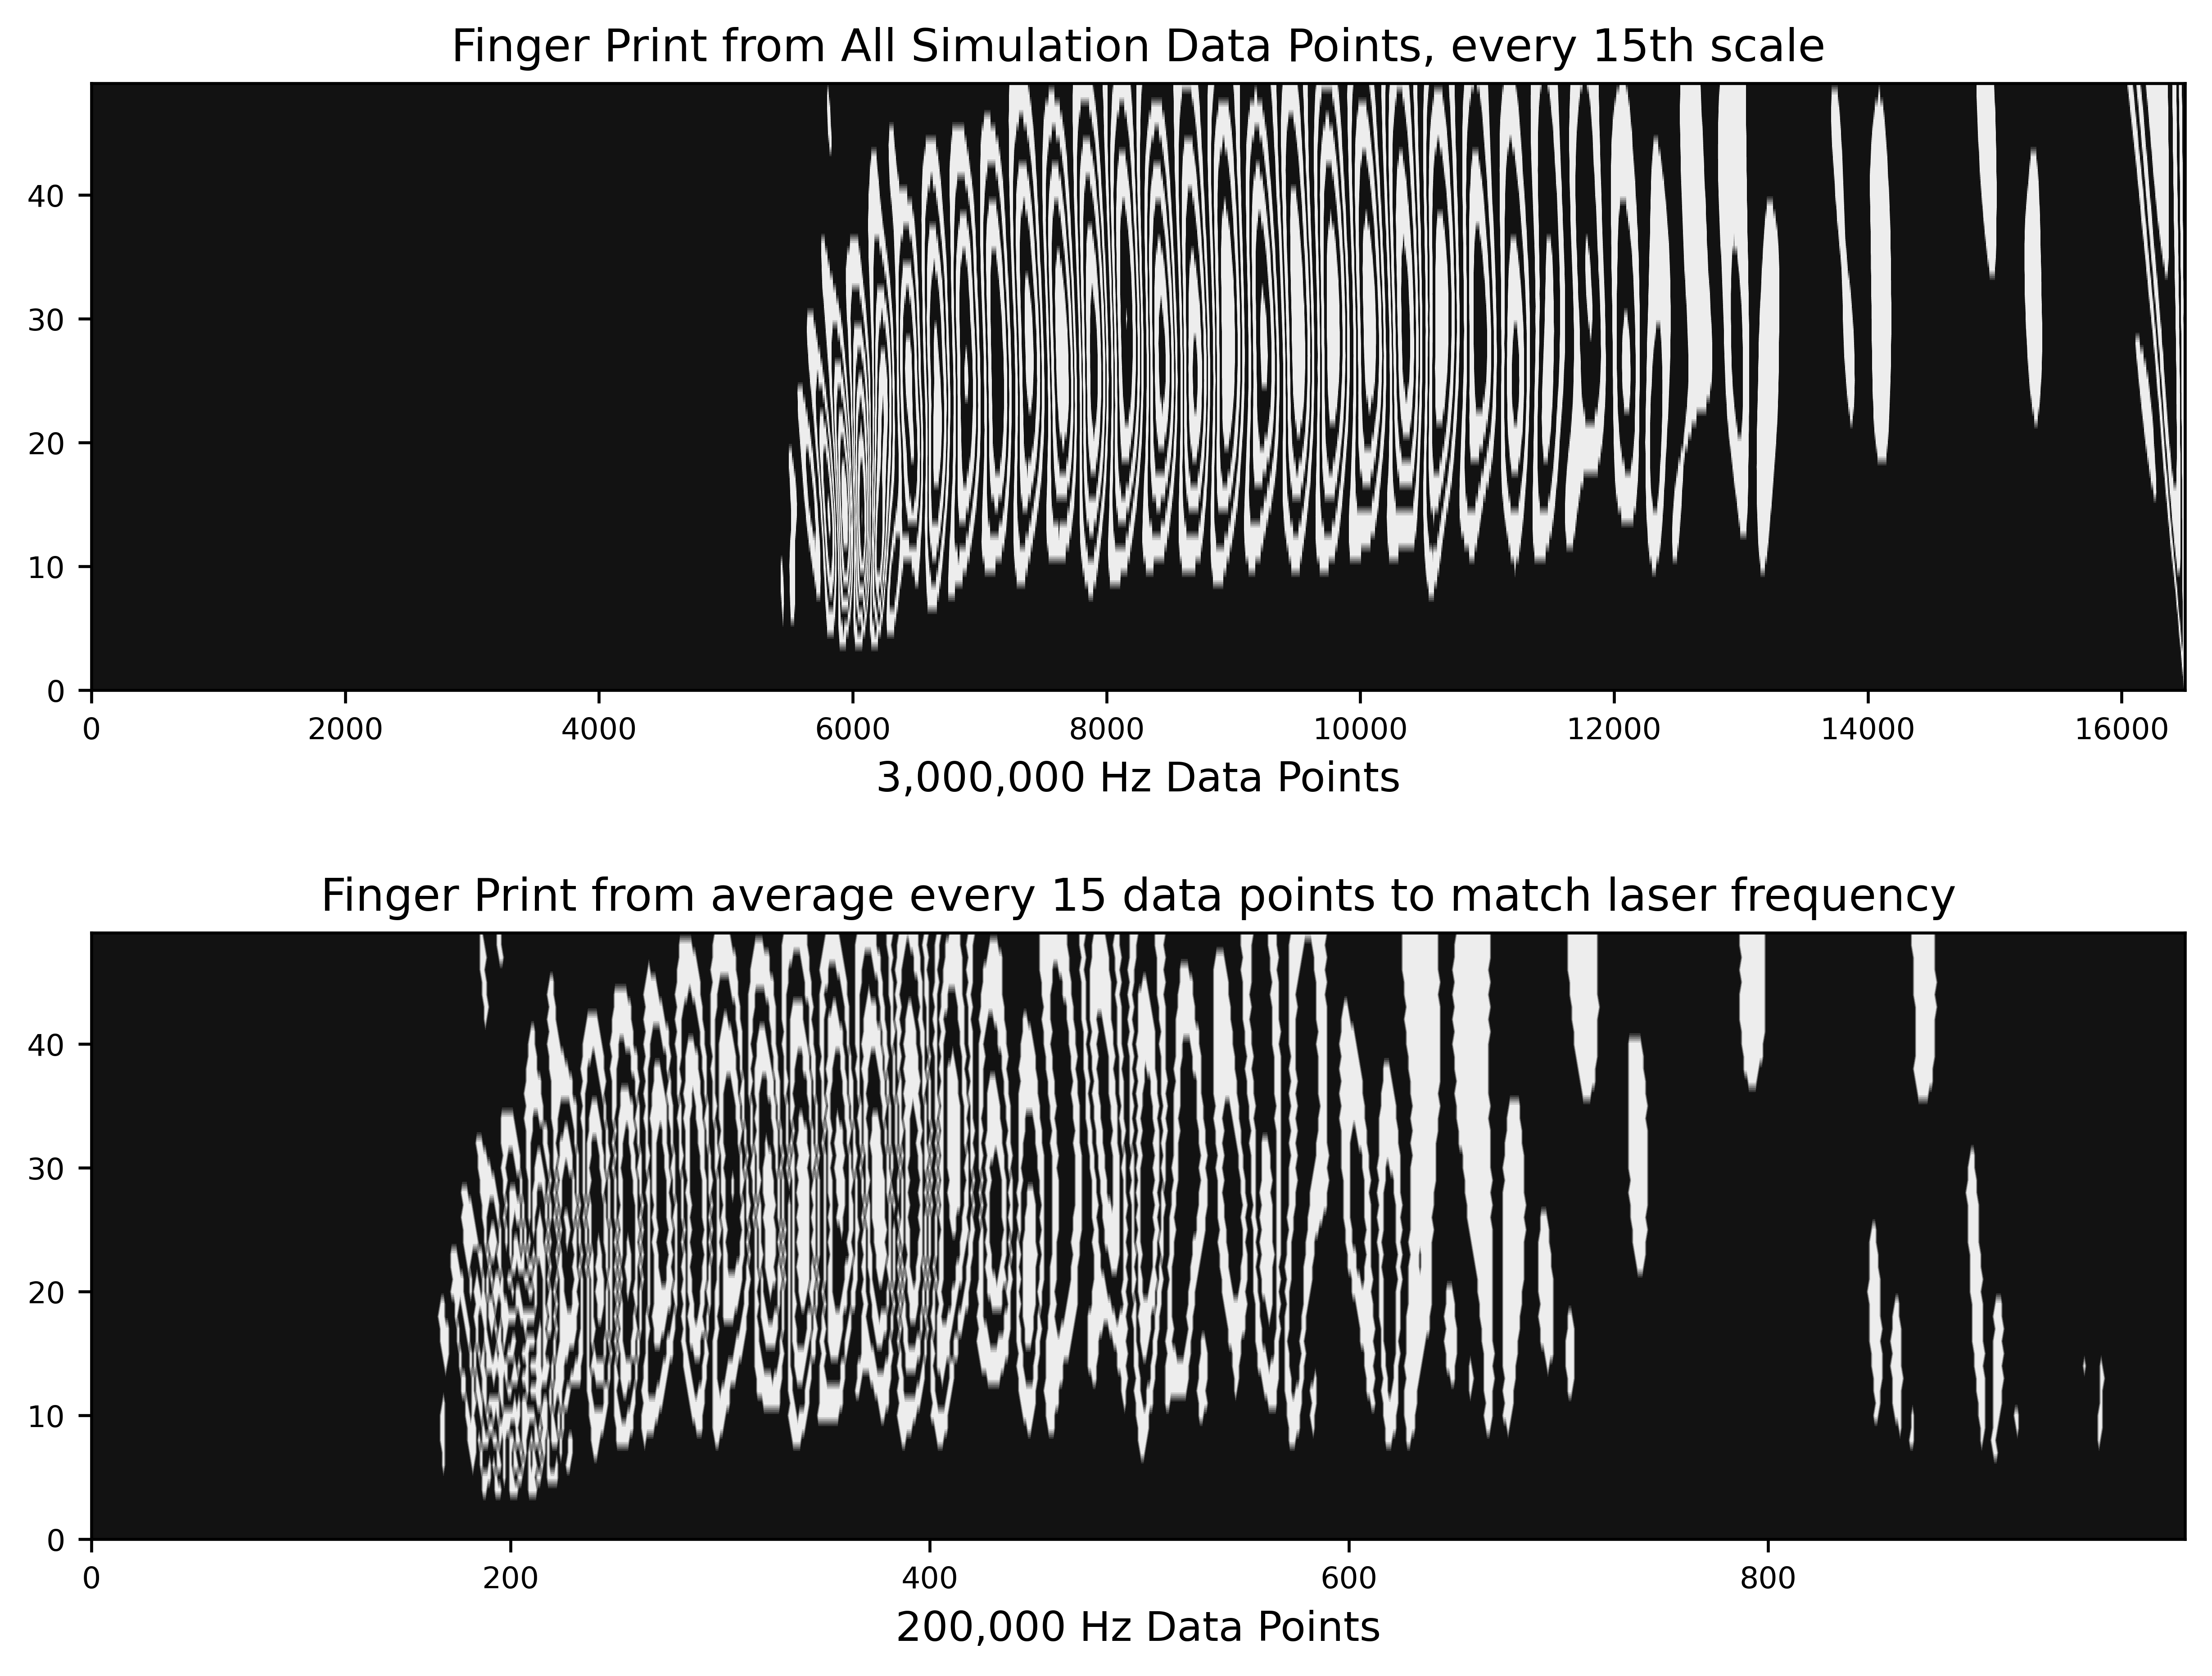

In [37]:
fig,axs = plt.subplots(2,figsize=(10,7), dpi=600)
plt.subplots_adjust(hspace=0.4)
axs[0].contourf(TP1.T, cmap='gist_gray')
axs[0].set_title('Finger Print from All Simulation Data Points, every 15th scale')
axs[0].set_xlabel('3,000,000 Hz Data Points',fontsize=11)
axs[0].tick_params(labelsize=8)
axs[1].contourf(TPD.T, cmap='gist_gray')
axs[1].set_title('Finger Print from average every 15 data points to match laser frequency')
axs[1].set_xlabel('200,000 Hz Data Points', fontsize=11)
axs[1].tick_params(labelsize=8)
plt.show()

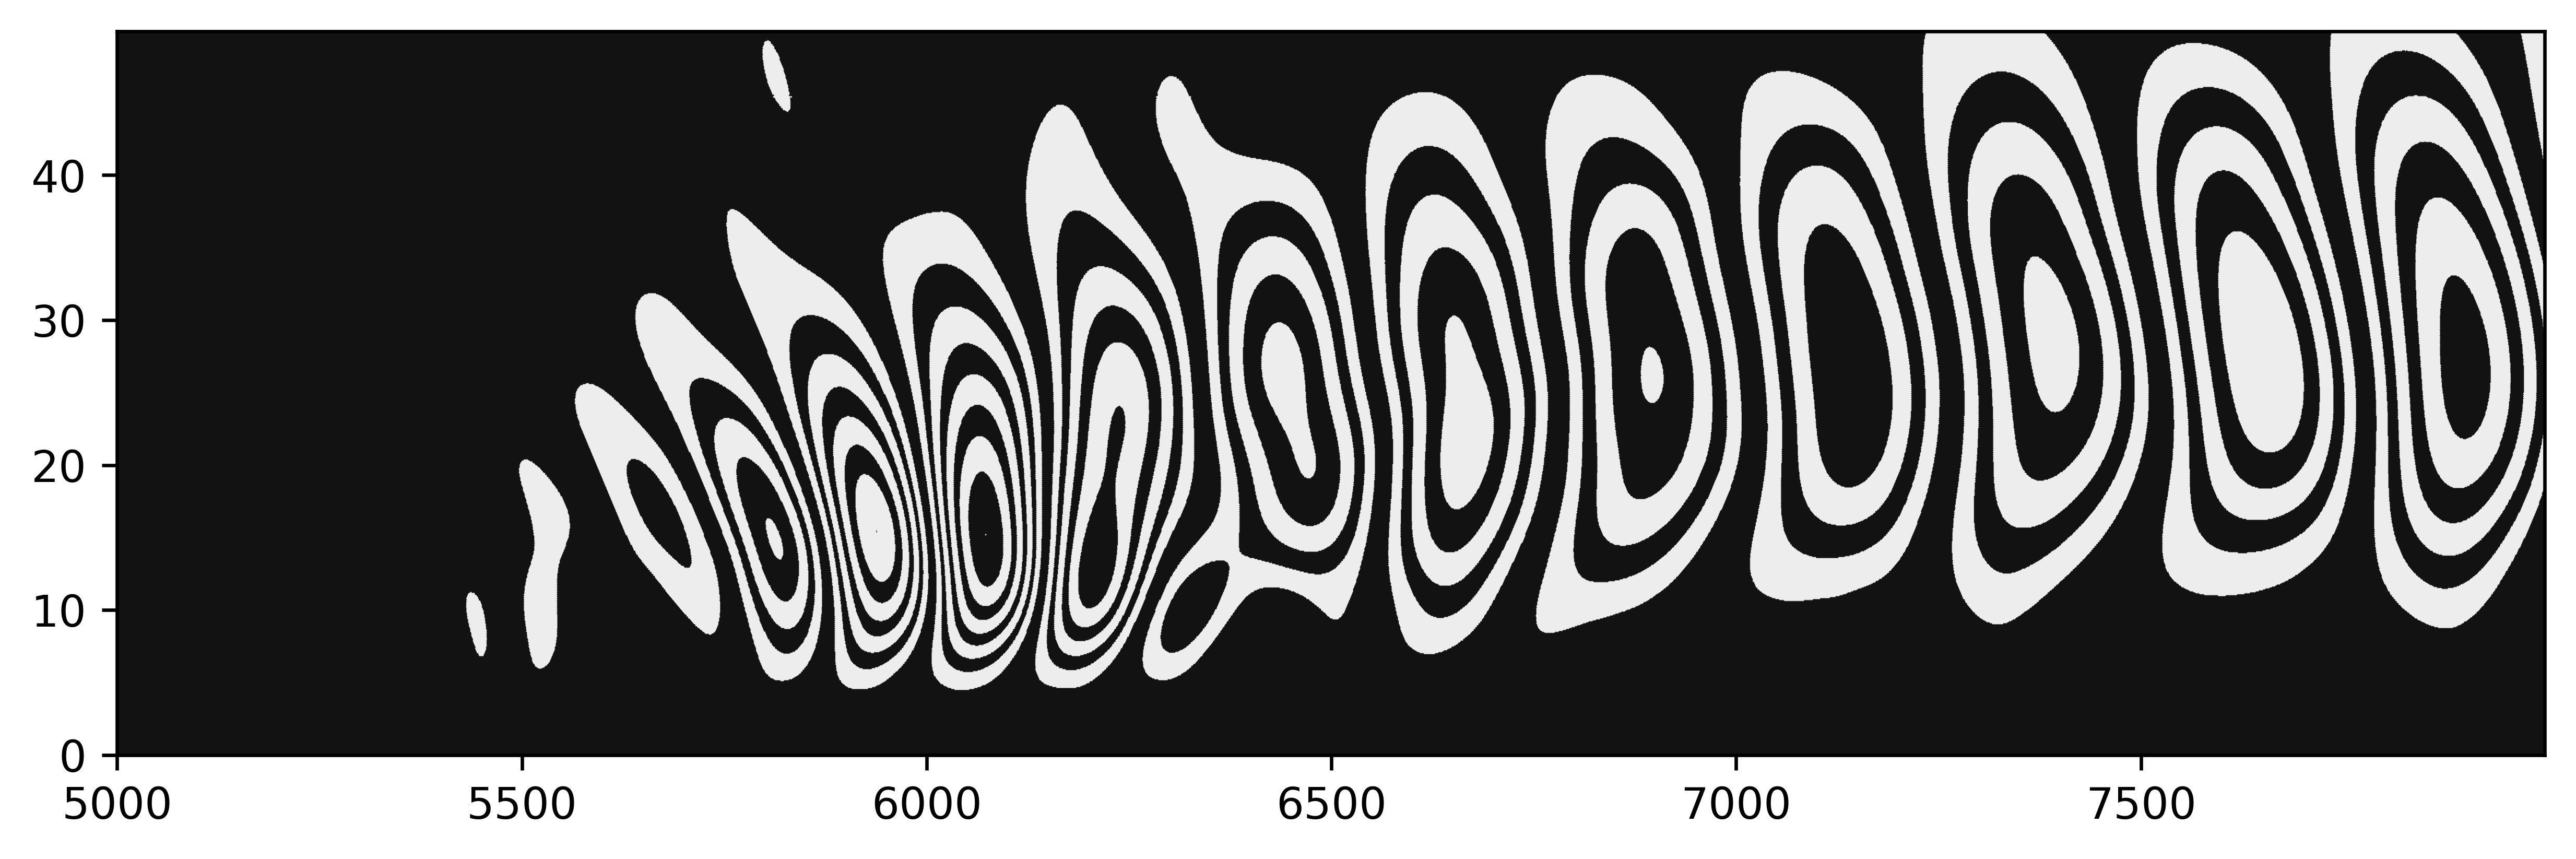

In [38]:
TP1f = cf.getThumbprint2(cf.Smoothing(Data[CS,row,start:end].T,3), wvt=Wvlt, ns=NumScales*sr, 
                        scalespace = 1, numslices=6, slicethickness=0.12, 
                        valleysorpeaks='both', normconstant=1, plot=True)

fig = plt.figure(figsize=(10,3), dpi=600)
X = np.arange(0,50,1/15)
Y = np.arange(5000,8000)
plt.contourf(Y,X,TP1f[5000:8000].T, cmap='gist_gray')
plt.show()

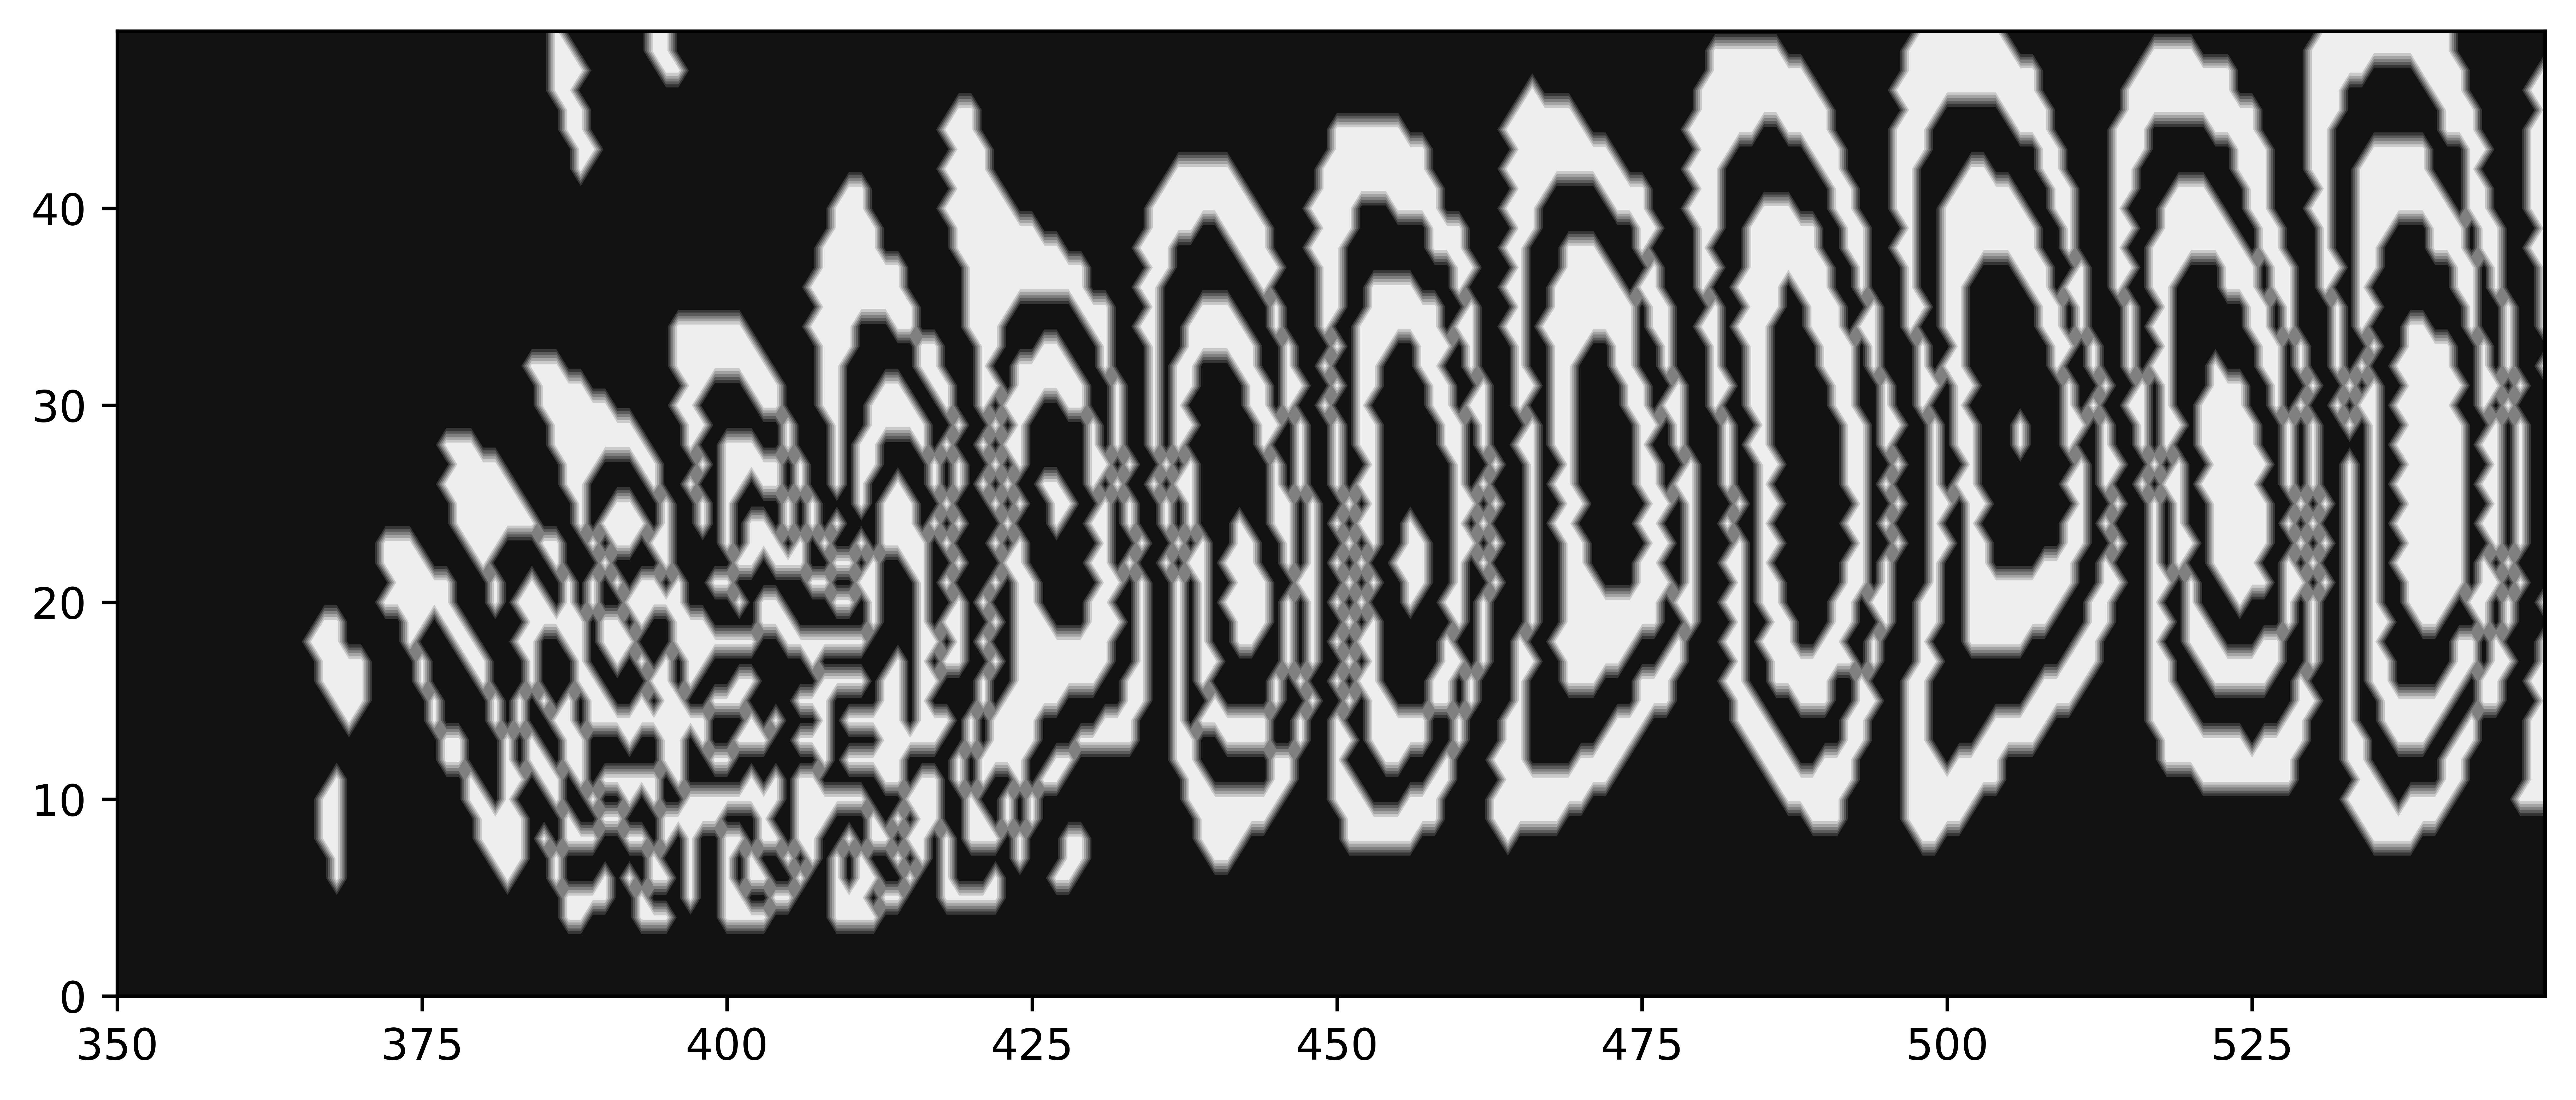

In [39]:
fig = plt.figure(figsize=(10,4), dpi=1200)
X = np.arange(0,50)
Y = np.arange(350,550)
plt.contourf(Y,X,TPD.T[:,150:350], cmap='gist_gray')
plt.show()

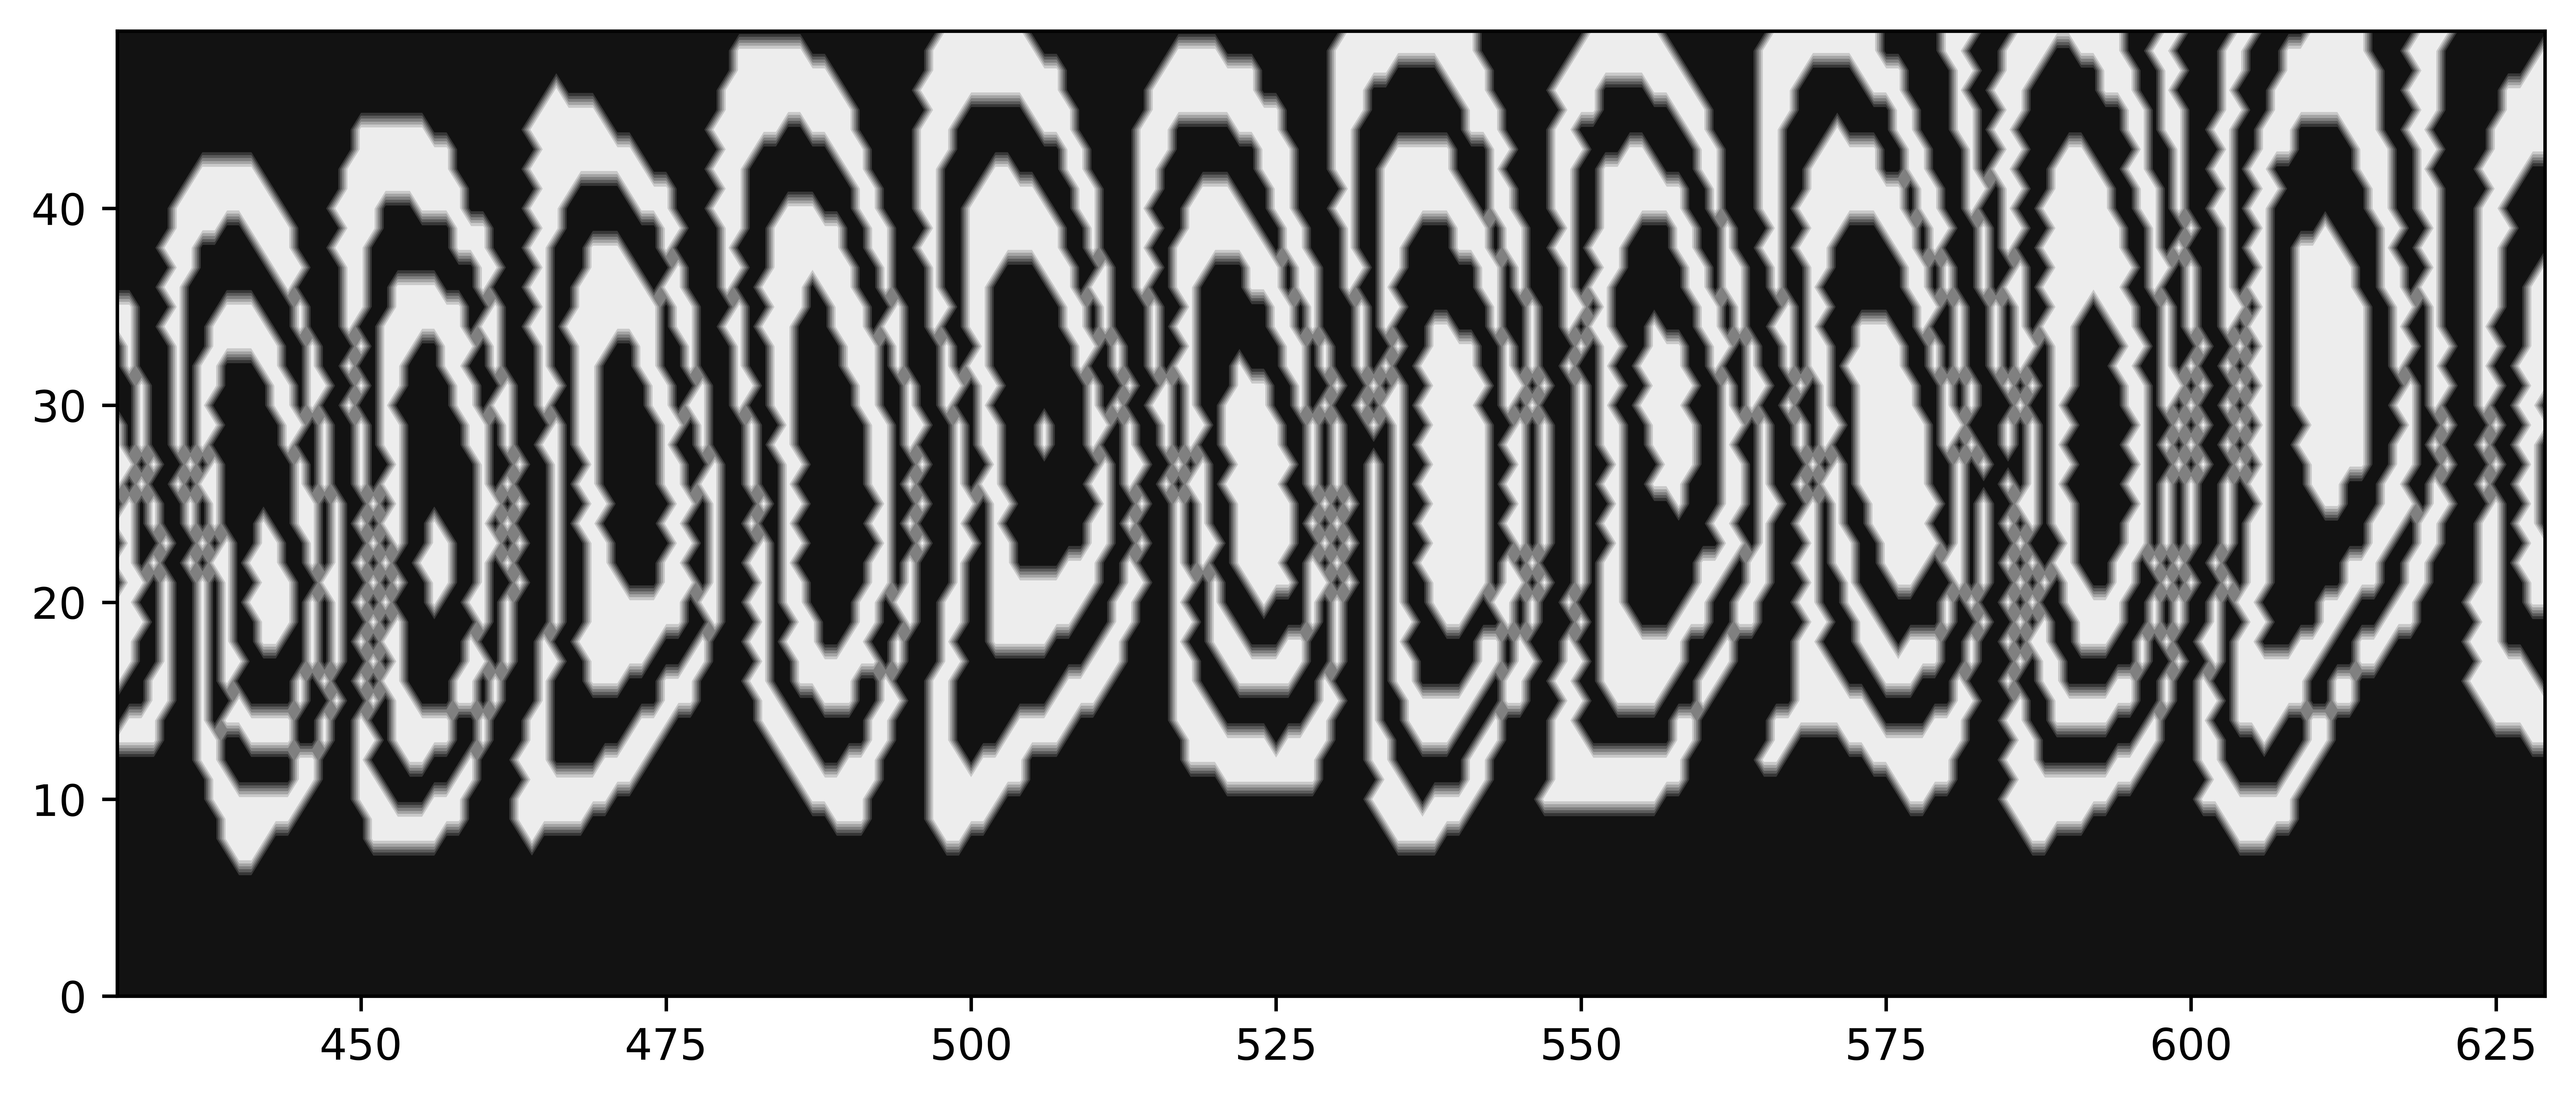

In [40]:
fig = plt.figure(figsize=(10,4), dpi=1200)
X = np.arange(0,50)
Y = np.arange(430,630)
plt.contourf(Y,X,TPD.T[:,230:430], cmap='gist_gray')
plt.show()

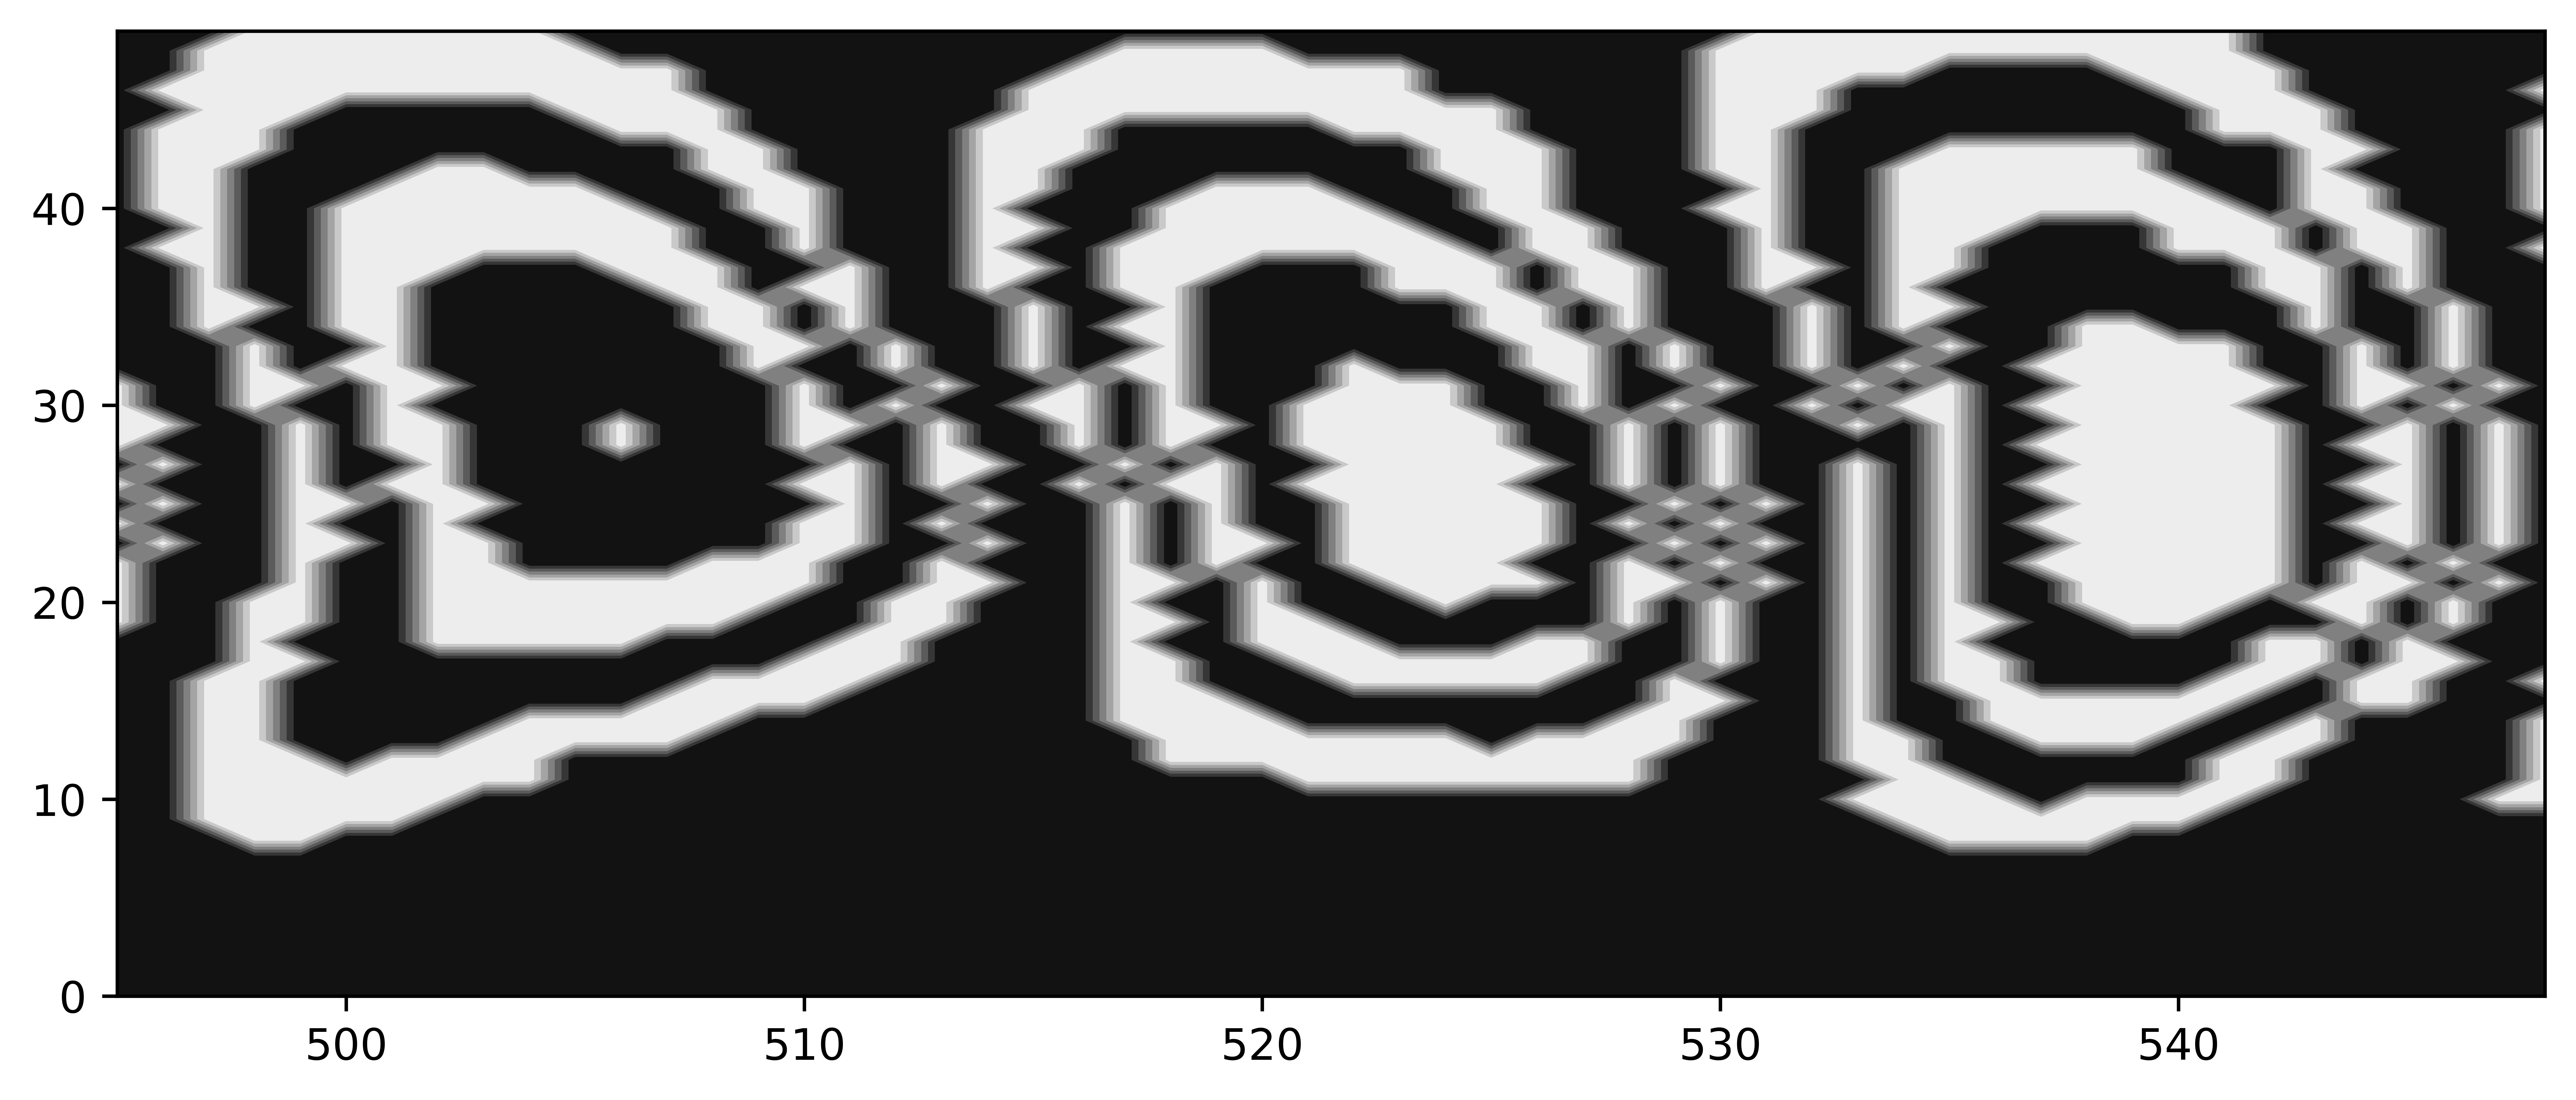

In [41]:
fig = plt.figure(figsize=(10,4), dpi=1200)
X = np.arange(0,50)
Y = np.arange(495,549)
plt.contourf(Y,X,TPD.T[:,295:349], cmap='gist_gray')
plt.show()

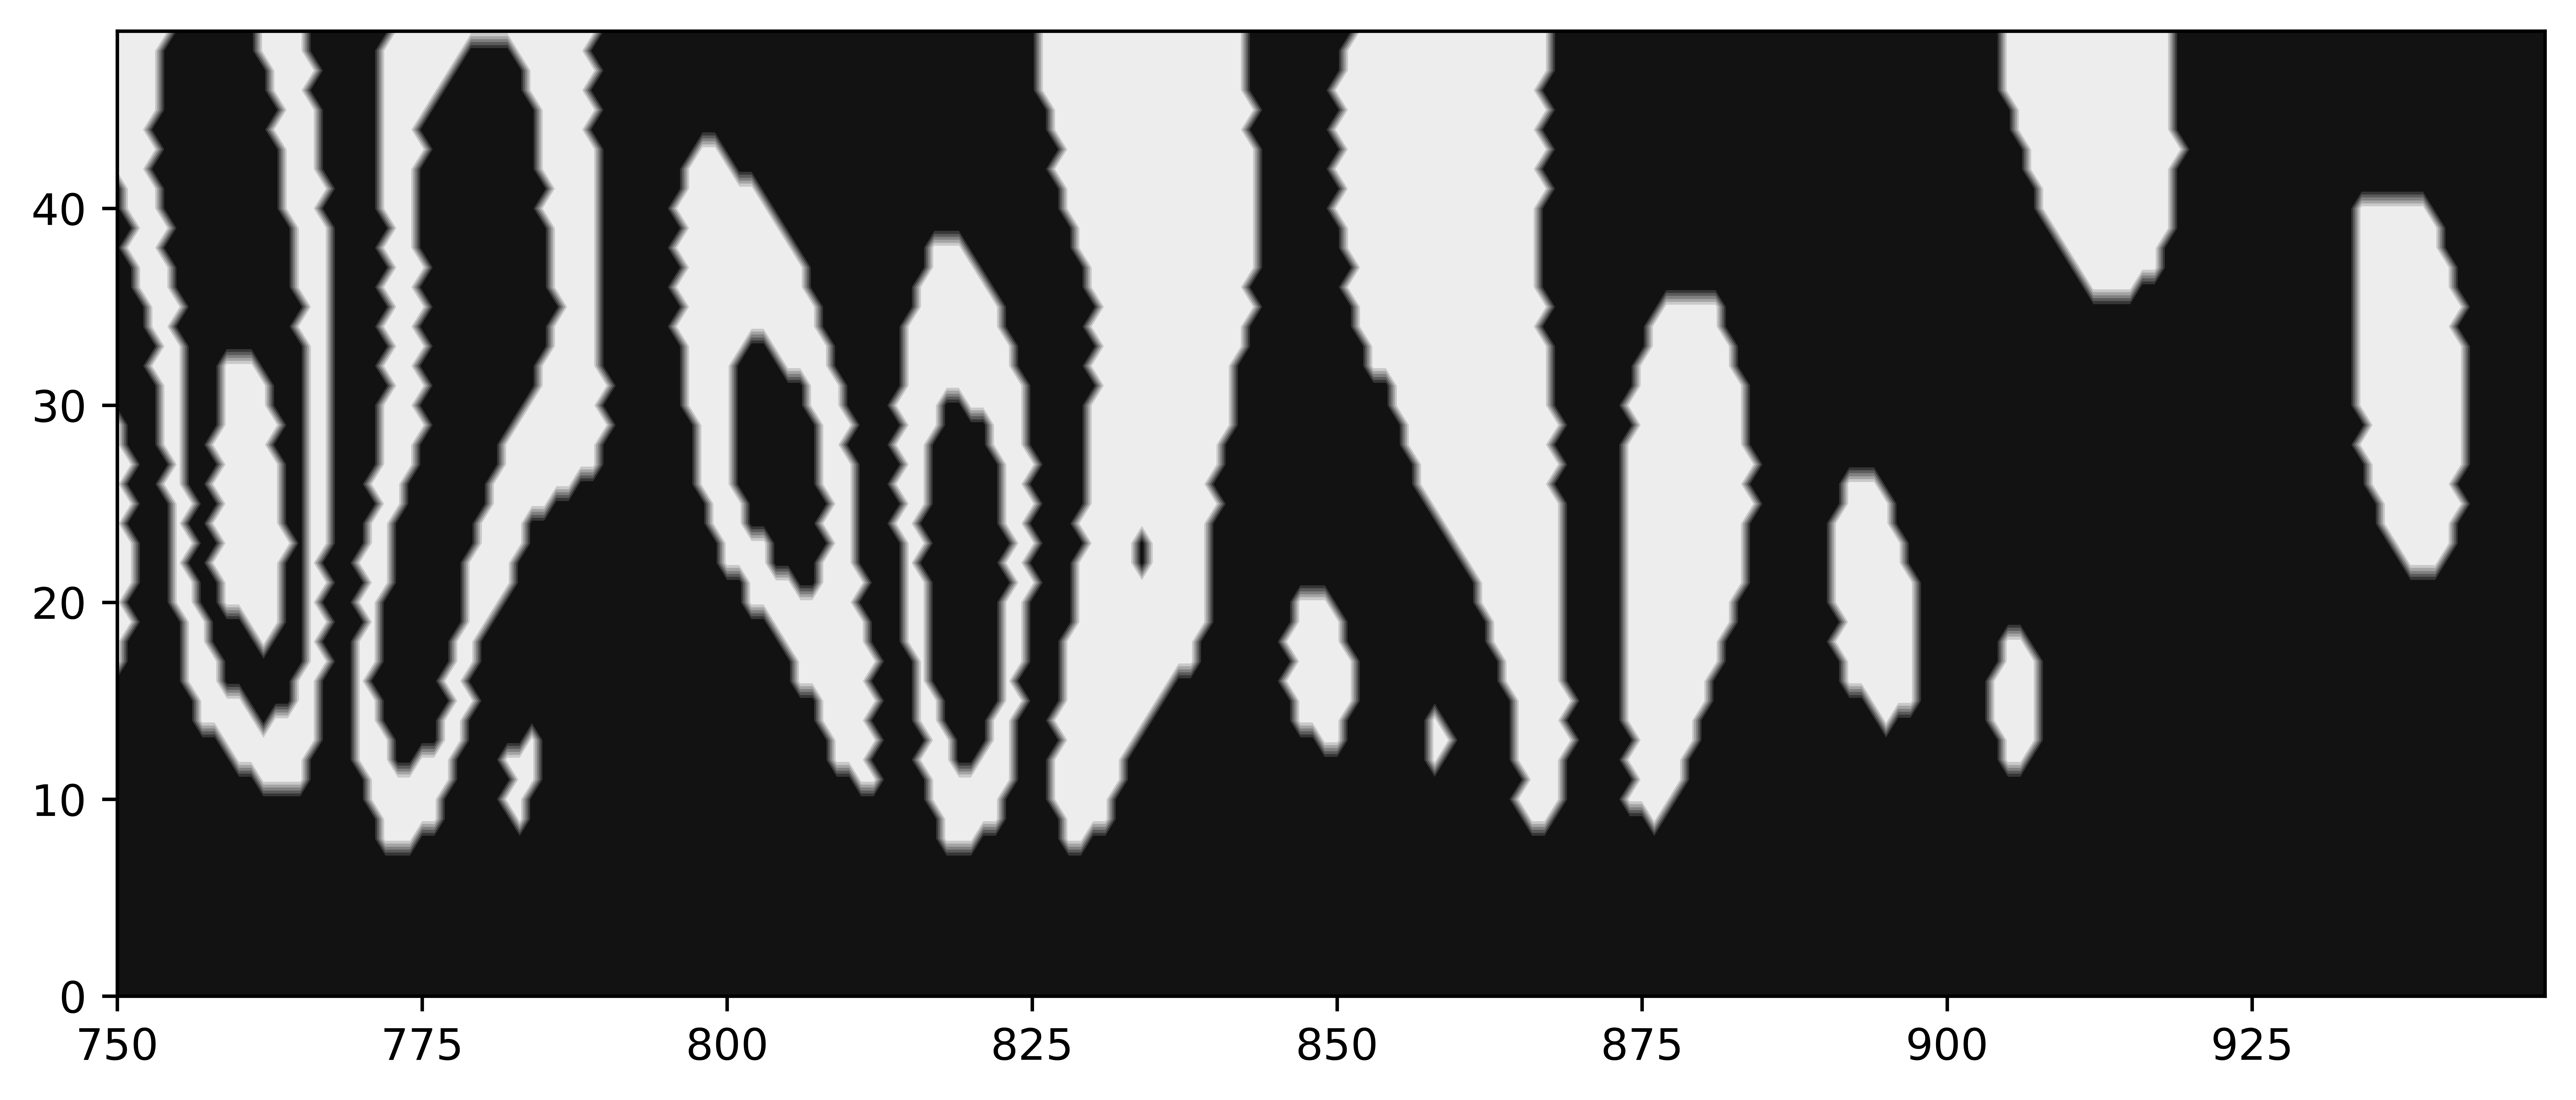

In [42]:
fig = plt.figure(figsize=(10,4), dpi=1200)
X = np.arange(0,50)
Y = np.arange(750,950)
plt.contourf(Y,X,TPD.T[:,550:750], cmap='gist_gray')
plt.show()

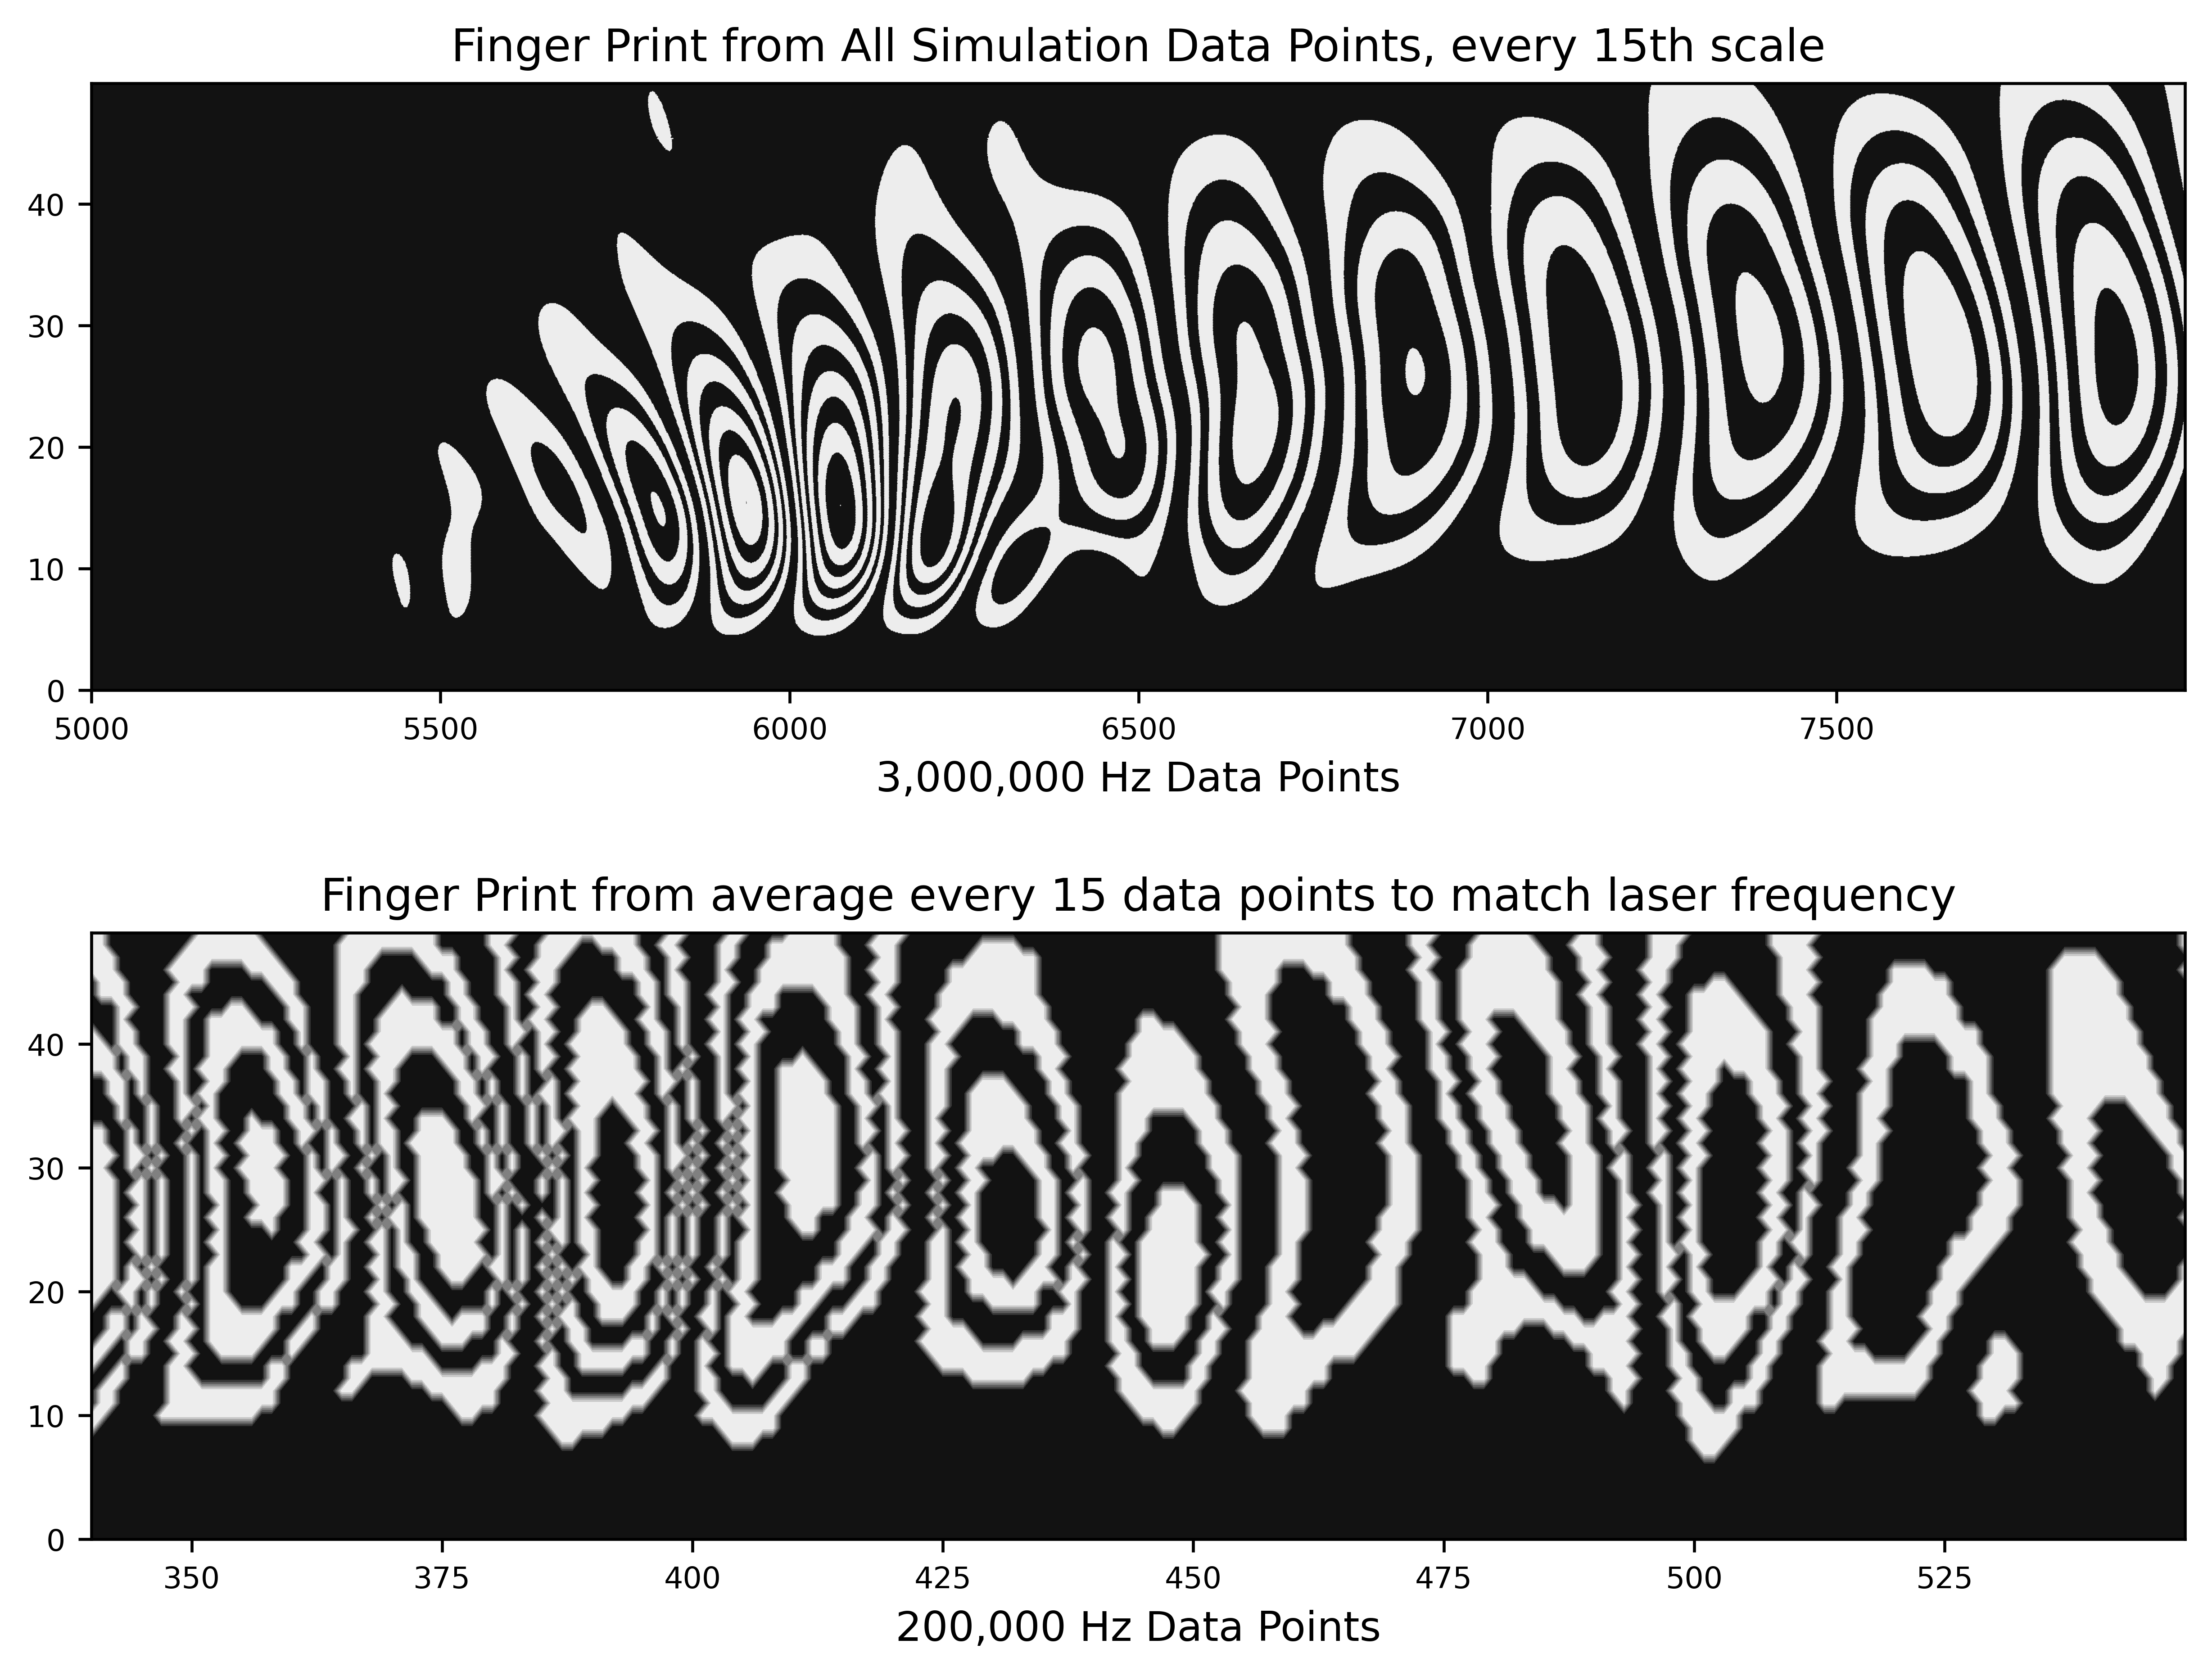

In [43]:
fig,axs = plt.subplots(2,figsize=(10,7), dpi=600)
plt.subplots_adjust(hspace=0.4)
X = np.arange(0,50,1/15)
Y = np.arange(5000,8000)
axs[0].contourf(Y,X,TP1f[5000:8000].T, cmap='gist_gray')
axs[0].set_title('Finger Print from All Simulation Data Points, every 15th scale')
axs[0].set_xlabel('3,000,000 Hz Data Points',fontsize=11)
axs[0].tick_params(labelsize=8)
X = np.arange(0,50)
Y = np.arange(340,550)
axs[1].contourf(Y,X,TPD.T[:,340:550], cmap='gist_gray')
axs[1].set_title('Finger Print from average every 15 data points to match laser frequency')
axs[1].set_xlabel('200,000 Hz Data Points', fontsize=11)
axs[1].tick_params(labelsize=8)
plt.show()

In [44]:
Y.shape

(210,)

/sciclone/home/dchendrickson01/.conda/envs/torchmpi/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


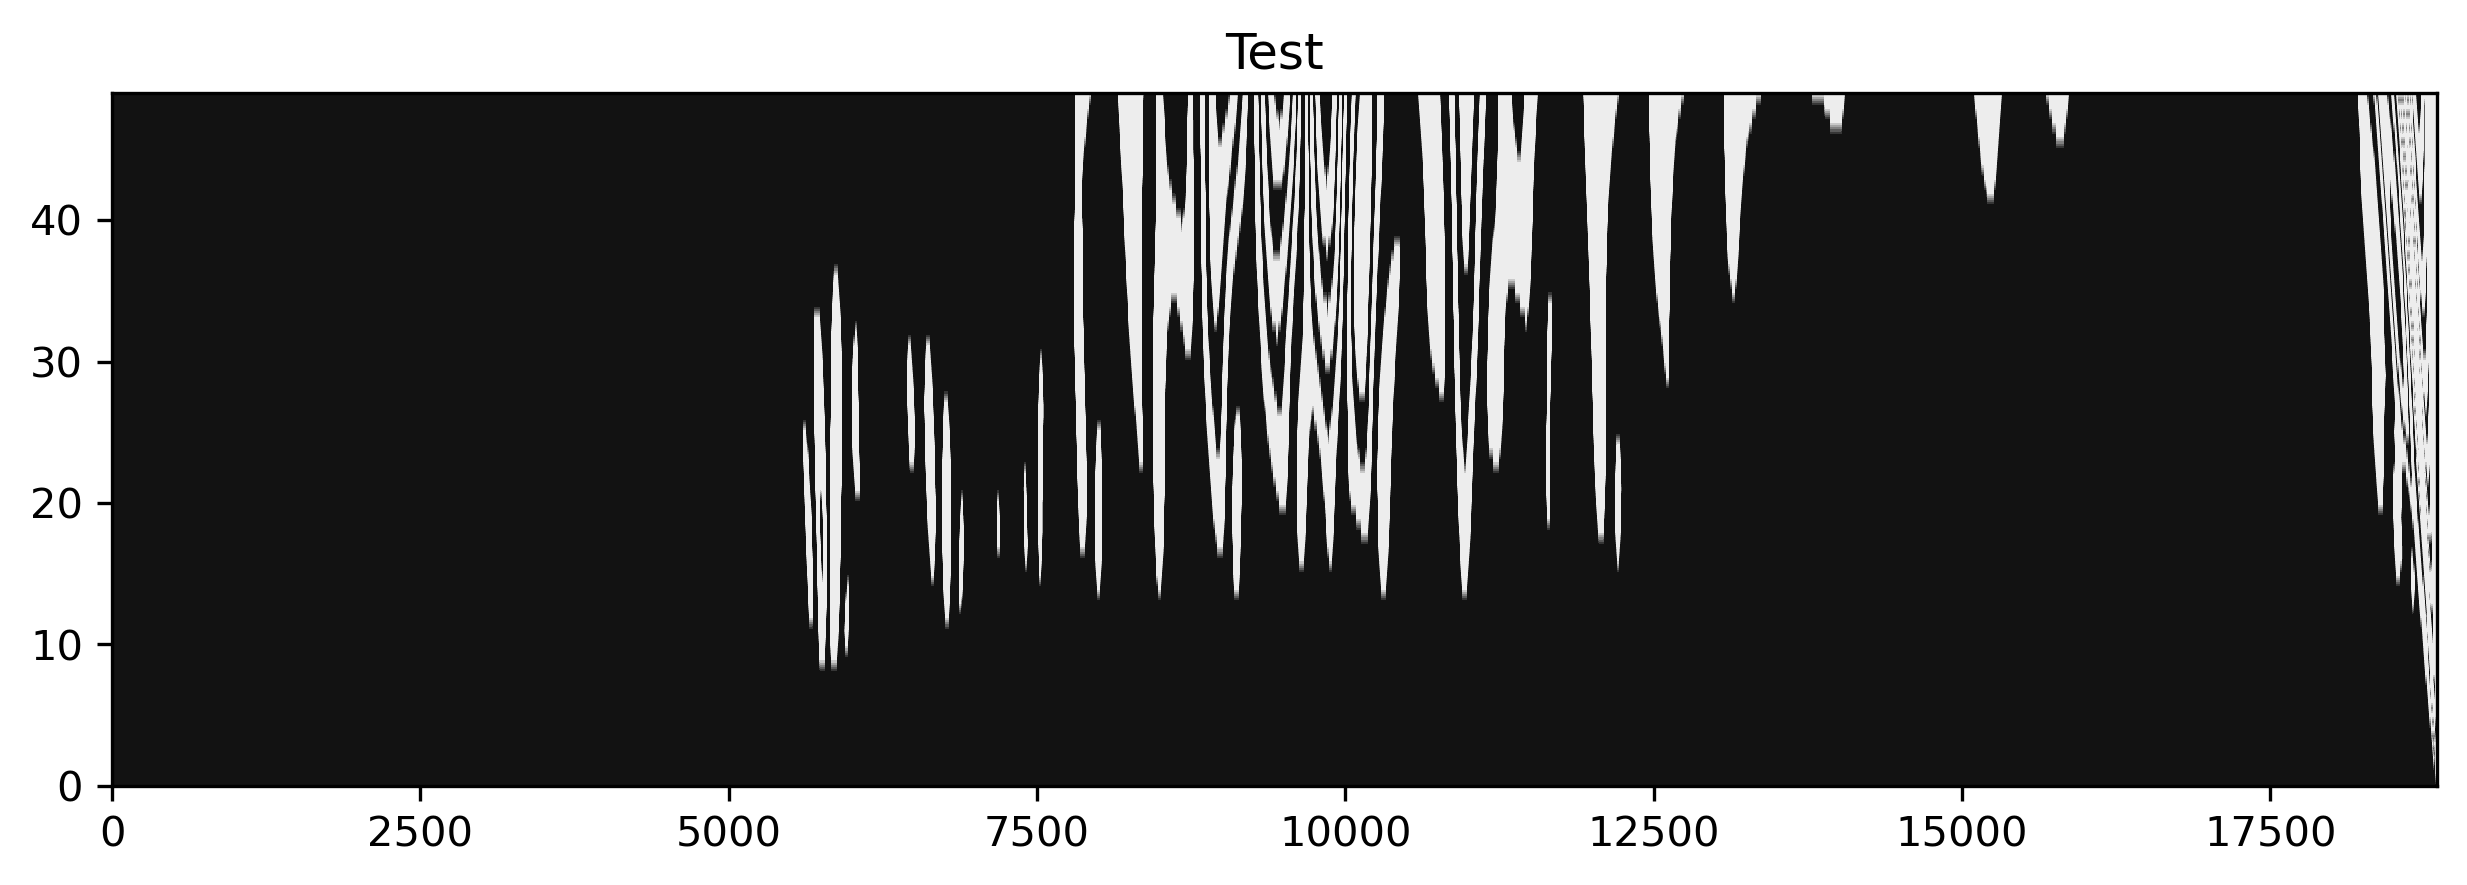

In [45]:
TPD = cf.getThumbprint2(cf.Smoothing(Data[CS,row,start:]-Data[CE,row,start:],3), wvt=Wvlt, ns=50, 
                        scalespace = 10, numslices=15, slicethickness=0.12, 
                        valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TPD.T, cmap='gist_gray')
plt.title('Test')
plt.show()

   ## Feature Vector

In [46]:
import DWFT as df

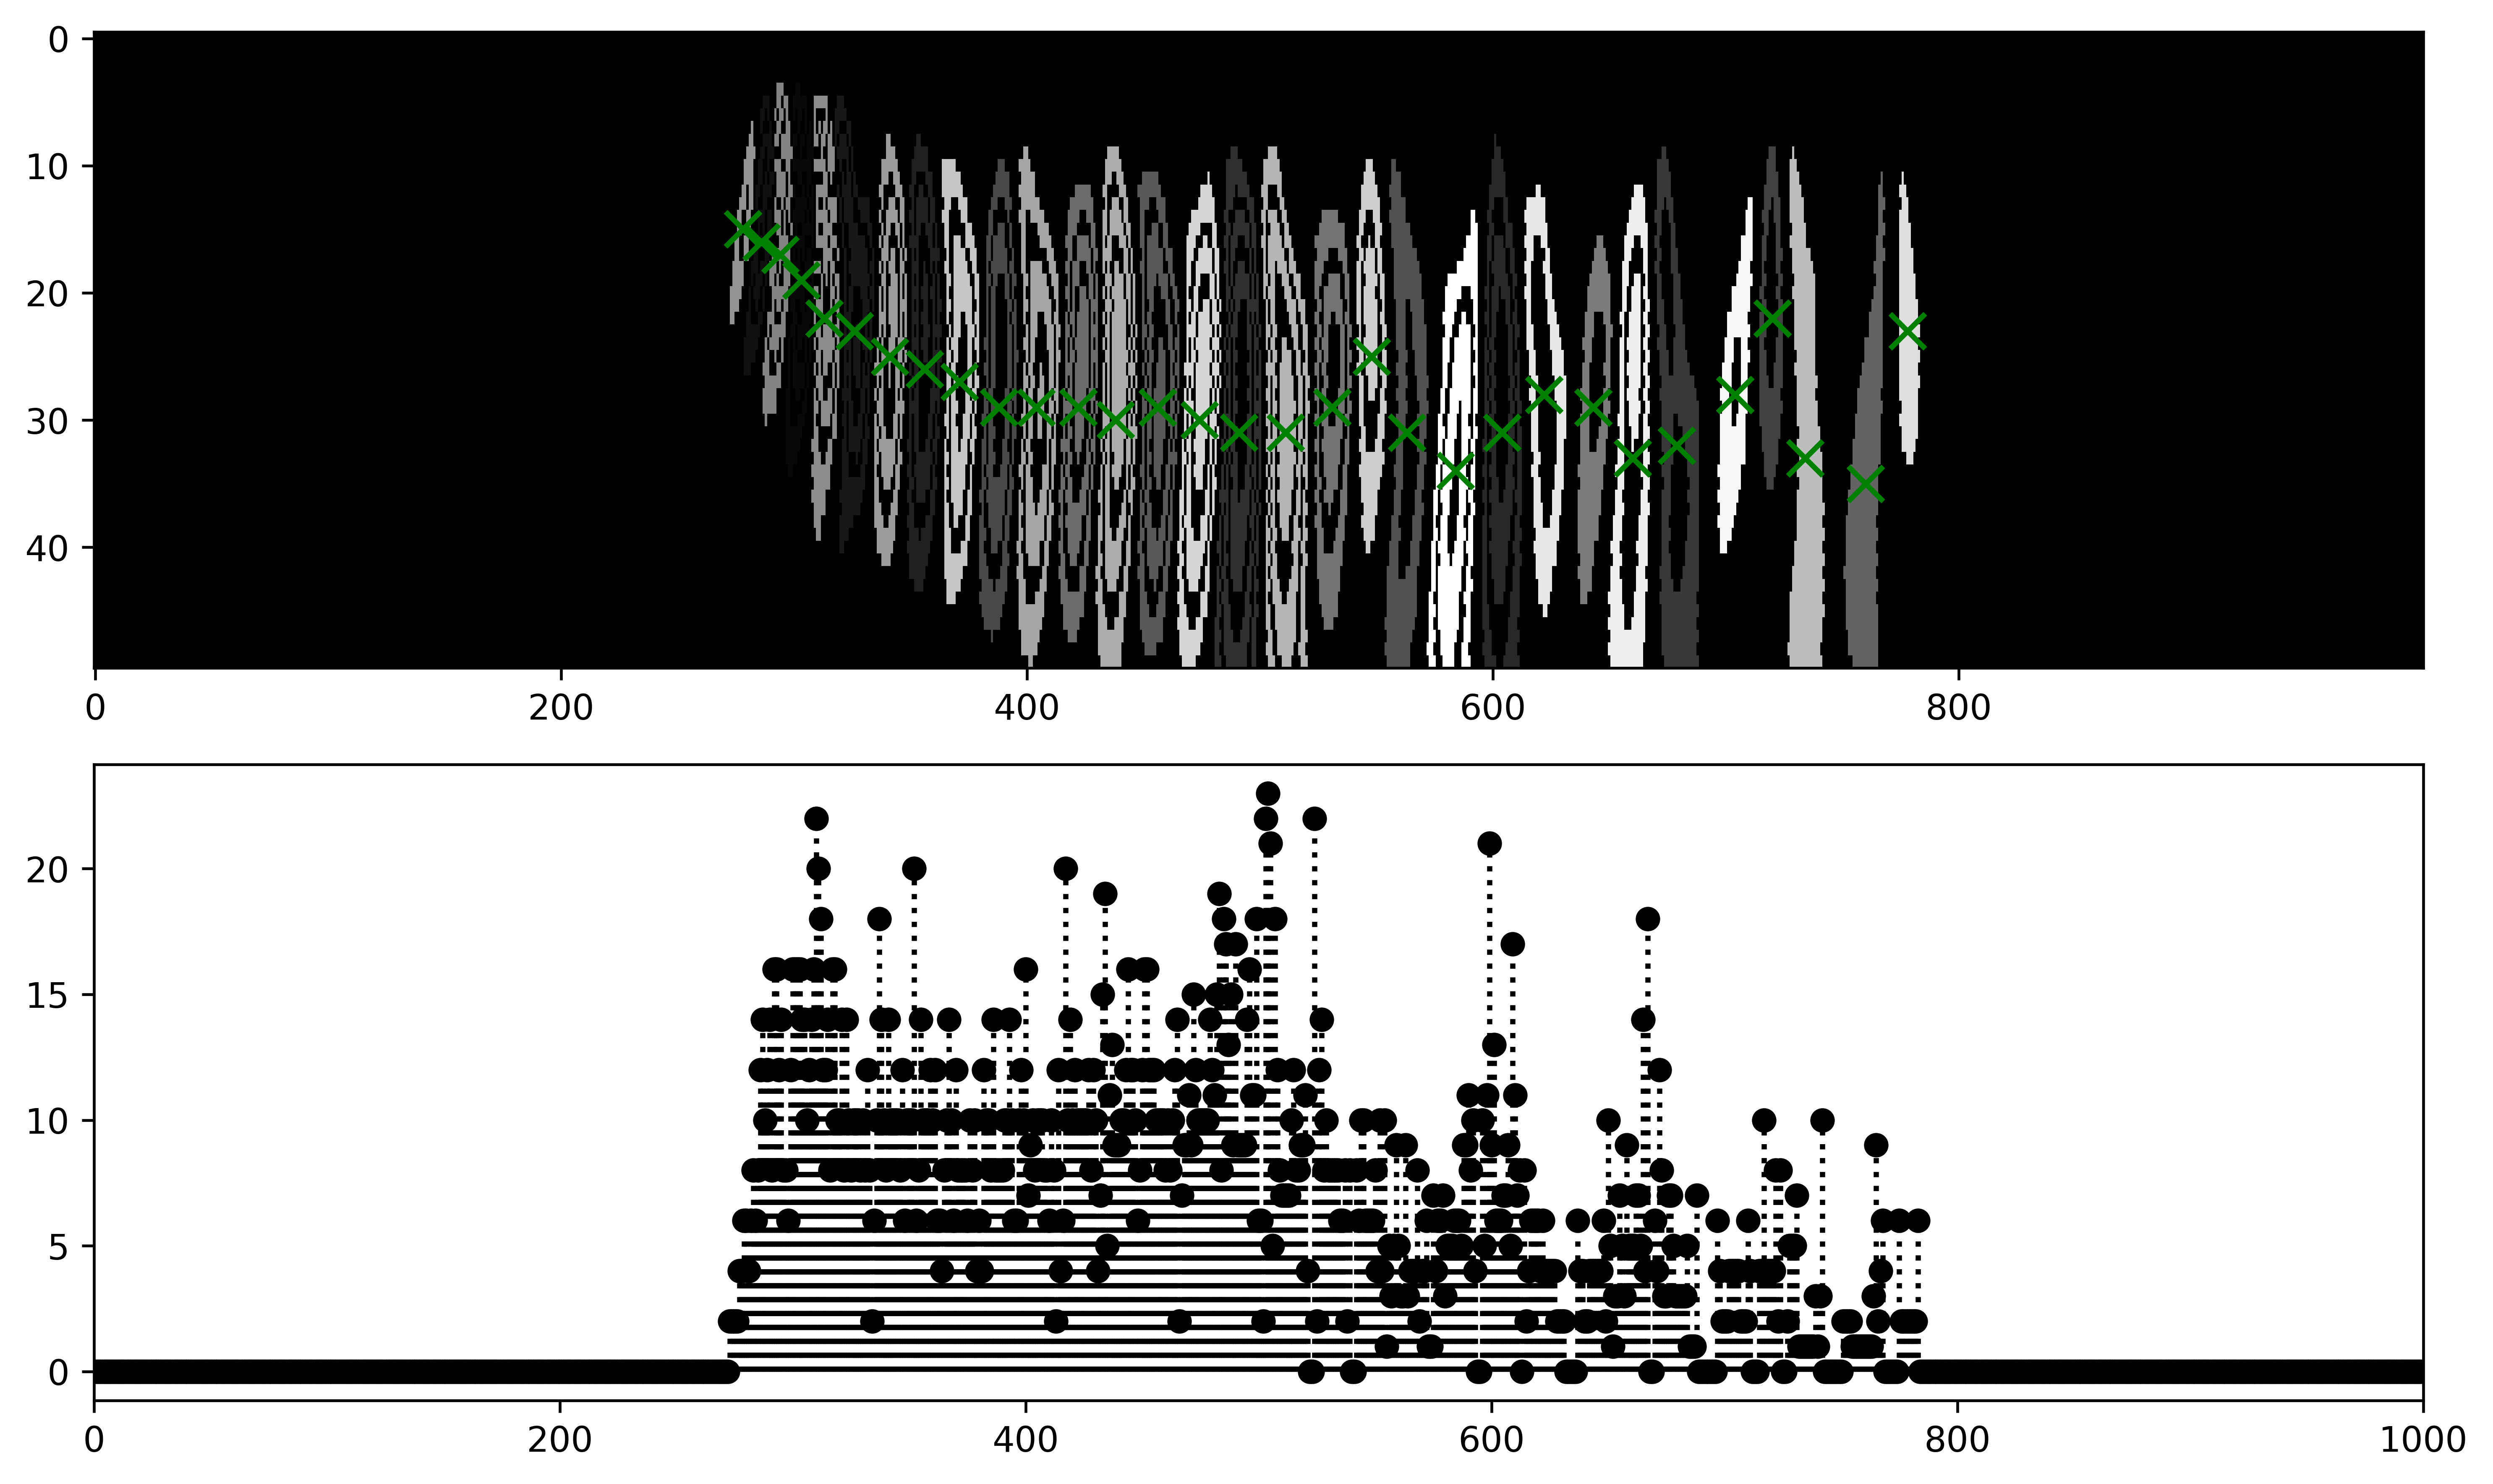

In [47]:
test, fbcom = df.getProcessedFP(SampledD[100:1100],wvt=Wvlt,graph=True)

In [48]:
Vect=[]

test, fbcom = df.getProcessedFP(SampledD[100:1100],'db3',graph=False)

In [49]:
for i in range(fbcom.shape[0]):
    Vect.append(df.FPFeatureVector(test,i)[0])
    

In [50]:
#np.savetxt('TopHitLFP-'+Wvlt+'.csv',test,delimiter=',')
#np.savetxt('TopHitVector-'+Wvlt+'.csv',Vect,delimiter=',')

In [51]:
fbcom=np.matrix(fbcom)

In [52]:
fbcom=np.concatenate((fbcom,np.matrix(np.arange(0,fbcom.shape[0])).T),axis=1)

In [53]:
Vect=np.matrix(Vect)

In [54]:
fbcom.shape

(32, 3)

In [55]:
Vect.shape

(32, 26)

In [56]:
CombiData = np.concatenate((fbcom,Vect),axis=1)

In [57]:
CombiData.shape

(32, 29)

In [58]:
CombiData[0,:]


matrix([['0.0', '0.0', '0.0', '619.9786194499669', '29.778339950600113',
         '-0.0009889042785906701', '0.9988458340909234', '0.0', '0.0',
         '-495.26254510464275', '0.0', '0.0', '0.0', '0.0',
         '-495.26254510464275', '4.870870870870871',
         '1.9988684184893142', '1.6996996996996998',
         '1.8516429825665885', '23.611474621121', '999.0',
         '230.06209569296877', '0.8314', '41570.0', '48673.0', '-141.0',
         '50000.0', '0.8314', 'na']], dtype='<U32')

In [59]:
CombiData[1,:]


matrix([['302.75545851528386', '19.40174672489083', '1.0',
         '17.00352869128806', '5.320752609208583', '1.7334673673129481',
         '0.9497793238514196', '0.5955710955710954',
         '-1.9363636363636367', '-298.1698401999607',
         '-0.023892773892773955', '-0.042346542346543815',
         '1.192890442890444', '-1.1825951825952092',
         '-299.8901199202404', '6.0', '5.271159641572442', '7.0',
         '5.656854249492376', '19.367469879518072', '11.0',
         '14.538148590038452', '0.44623655913978494', '166.0', '250.0',
         '-17.0', '280.0', '0.5928571428571429', 'na']], dtype='<U32')

In [60]:
#sorted_matrix_asc=sorted_matrix_asc.reshape((sorted_matrix_asc.shape[0],sorted_matrix_asc.shape[2]))

In [61]:
#np.savetxt('TopHitSimulationFPResults-'+Wvlt+'.csv',CombiData,delimiter=',')

In [62]:
SinglePrint = df.getObjPMat(test, 13)

In [63]:
P = df.getObjPMat(test, 13)

In [64]:
    
# Create a temporary fingerprint of size fp that only has values for P
tempFP = np.zeros(test.shape)

In [65]:
test.shape

(50, 1000)

In [66]:
for point in P:
    tempFP[int(point[1]), int(point[0])] = 1

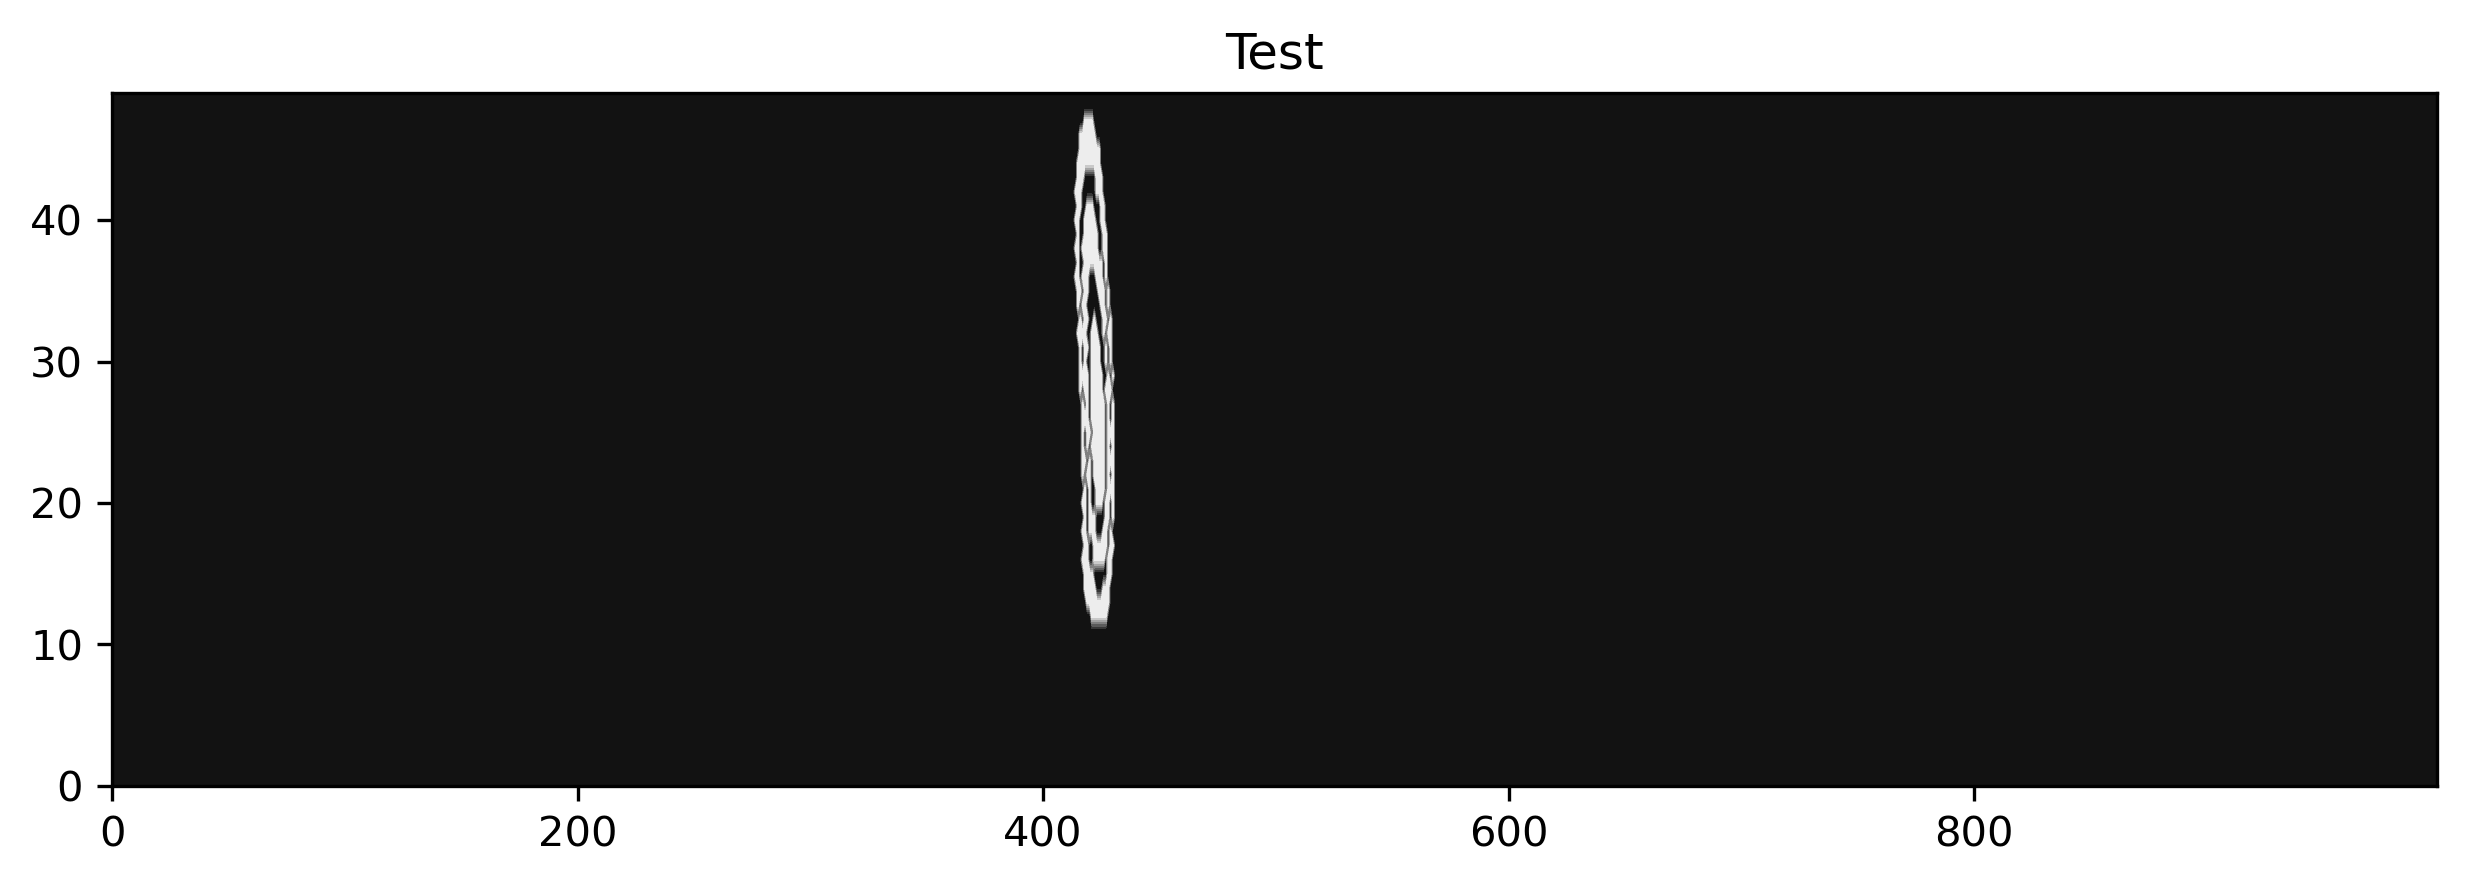

In [67]:
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(tempFP, cmap='gist_gray')
plt.title('Test')
plt.show()

In [68]:
h=df._RidgeCount1FP(tempFP)

In [70]:
h


16.0

In [69]:
asdfasdf


NameError: name 'asdfasdf' is not defined

In [ ]:
RC = df.RidgeCount(SinglePrint)

In [ ]:
RC

In [ ]:
SinglePrint.shape

In [ ]:
diff = np.zeros((fingerprint.shape))

for i, row in enumerate(fingerprint):
    if i==0:
        prev = row
    else:
        # First row (i=0) of diff will always be 0s because it does not
        # matter what values are present. 
        # First find where the rows differ
        diff_vec = abs(row-prev)
        # Then set those differences to 1 to be added later
        diff_vec[diff_vec != 0] = 1
        diff[i, :] = diff_vec

        prev = row

ridgeCount = diff.sum(axis=0)

In [ ]:
asdfasdf

## Make Gif


In [ ]:
from PIL import Image
import glob

In [ ]:
from joblib import Parallel, delayed
num_jobs=15

In [ ]:
def MakeImages(i):
    fig = plt.figure(figsize=(4,4), dpi=150)
    plt.axis('off')
    plt.contourf(Data[xs:xe,:,i].T, v, cmap=plt.cm.jet)
    plt.title(i)
    plt.savefig(imFolder+'qAni2/Image_'+str(i).zfill(5)+'.png')
    #plt.show()
    plt.close()
    return i

In [ ]:
ts = 2000
te = np.shape(Data[xs:xe,:,:])[2]
tt = 10

In [ ]:
Sets = np.arange(ts,te,tt)
temp = Parallel(n_jobs=num_jobs)(delayed(MakeImages)(i) for i in Sets)
    

In [ ]:
# Create the frames
frames = []
png_images = glob.glob(imFolder+'qAni2/*.png')

In [ ]:
png_images.sort()

In [ ]:
len(png_images)

In [ ]:
for image_path in png_images:
    new_frame = Image.open(image_path)
    frames.append(new_frame)

# Save the PNG images into a GIF file that loops forever
frames[0].save(imFolder+'QuickAnimation.gif', format='GIF', append_images=frames[1:], save_all=True, duration=10, loop=0)

## Tangent 2

In [ ]:
import numpy as np

In [ ]:
f = np.linspace(0,96000*np.pi,600000)
g =np.sin(f)

In [ ]:
fig=plt.figure(figsize=(10,3),dpi=300)
plt.plot(g)
plt.show()

In [ ]:
fig,axs = plt.subplots(3,figsize=(6,3), dpi=1200)
plt.subplots_adjust(hspace=0.5)
axs[0].plot(g)
axs[1].plot(g[100000:200000])
axs[2].plot(g[100000:101000])
plt.show()

In [ ]:
fp = cf.getThumbprint2(g[100000:101000],'db3',100,1)

In [ ]:
fig = plt.figure(figsize=(10,3), dpi=600)
plt.contourf(fp.T, cmap='gist_gray')
#plt.title(str(start))
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,3), dpi=600)
plt.contourf(fp[200:400].T, cmap='gist_gray')
#plt.title(str(start))
plt.show()

In [ ]:
from pywt._functions import integrate_wavelet, scale2frequency 

In [ ]:
int_psi, x = integrate_wavelet('bior2.2')